# **Santander Customer Satisfaction**

*09 de agosto, 2020*

## **1. Descrição geral do problema**

---

![Santander Customer Satisfaction](https://i.imgur.com/77GlNSE.png)

A satisfação do cliente é uma medida fundamental de sucesso. Clientes
insatisfeitos cancelam seus serviços e raramente expressam sua insatisfação antes
de sair. Clientes satisfeitos, por outro lado, se tornam defensores da marca!

O Banco Santander está pedindo para ajudá-los a identificar clientes
insatisfeitos no início do relacionamento. Isso permitiria que o Santander
adotasse medidas proativas para melhorar a felicidade de um cliente antes que
seja tarde demais.

Neste projeto de aprendizado de máquina criado pelo [Kaggle](https://www.kaggle.com/c/santander-customer-satisfaction/overview), iremos trabalhar com centenas
de recursos anônimos para prever se um cliente está satisfeito ou insatisfeito com
sua experiência bancária.

**Objetivo:** Utilizar a linguagem **Python**, para criar um modelo de aprendizagem de máquina que possa prever se um cliente está ou não satisfeito com sua experiência bancária.


---

## **2. Carregando Dados**

### **2.1 Importando bibliotecas necessárias**

Começaremos nosso projeto, importanto todas as bilbiotecas necessárias, para a realização das fases iniciais de exploração, e transformação dos dados (*Data Munging*).

In [ ]:
# Para ocultar Future Warnings.

import warnings

warnings.simplefilter(action = 'ignore', category = FutureWarning)

# Para a manipulação e exploração dos conjuntos de dados.

import numpy as np

import pandas as pd

# Para tarefas de Data Munging.

from sklearn.feature_selection import VarianceThreshold

# Importando bibliotecas necessárias para a plotagem de gráficos interativos com o plotly.

import plotly.offline as py

import plotly.graph_objs as go

py.init_notebook_mode(connected = False)

# Importando biblioteca necessária para a plotagem de gráficos.

import matplotlib.pyplot as plt

# Importando bibliotecas necessárias para balancear o conjunto de dados.

from imblearn.over_sampling import SMOTE

# Importando classes e bibliotecas necessárias para a etapa de pré-processamento dos dados.

from sklearn import preprocessing

from sklearn.preprocessing import MinMaxScaler, PowerTransformer, normalize, LabelEncoder, StandardScaler

# Importando biliotecas necessárias para a fase de Feature Selection.

from sklearn.decomposition import PCA

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

from sklearn.feature_selection import SelectKBest, SelectPercentile, mutual_info_classif, f_classif, RFE, chi2

# Importando bibliotecas necessárias para utilizar os algoritmos de Machine Learning.

import xgboost as xgb

from sklearn import tree

from sklearn.svm import SVC

from sklearn.naive_bayes import GaussianNB

from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

from sklearn.model_selection import KFold, cross_val_score, train_test_split

# Importando classe, para carregar e salvar modelos preditivos em arquivos externos.

import pickle

# Importando classe, para fazer a busca dos melhores parâmetros, a serem utilizados em cada um dos modelos treinados.

from sklearn.model_selection import GridSearchCV

# Importando classes, para calcular as métricas de avaliação dos modelos preditivos.

from sklearn.metrics import accuracy_score, balanced_accuracy_score, average_precision_score, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score, cohen_kappa_score

### **2.2 Carregando Dados**

In [ ]:
# Carregando dados de treino.

dataTrain = pd.read_csv('/content/datasets/train.csv')

In [ ]:
# Exibindo as primeiras linhas do DataFrame.

dataTrain.head()

ID  var3  var15  ...  saldo_medio_var44_ult3          var38  TARGET
0   1     2     23  ...                     0.0   39205.170000       0
1   3     2     34  ...                     0.0   49278.030000       0
2   4     2     23  ...                     0.0   67333.770000       0
3   8     2     37  ...                     0.0   64007.970000       0
4  10     2     39  ...                     0.0  117310.979016       0

[5 rows x 371 columns]

In [ ]:
# Carregando dados de teste.

dataTest = pd.read_csv('/content/datasets/test.csv')

In [ ]:
# Exibindo as primeiras linhas do DataFrame.

dataTest.head()

ID  var3  var15  ...  saldo_medio_var44_ult1  saldo_medio_var44_ult3      var38
0   2     2     32  ...                     0.0                     0.0   40532.10
1   5     2     35  ...                     0.0                     0.0   45486.72
2   6     2     23  ...                     0.0                     0.0   46993.95
3   7     2     24  ...                     0.0                     0.0  187898.61
4   9     2     23  ...                     0.0                     0.0   73649.73

[5 rows x 370 columns]

## **3. Análise Exploratória & Data Munging**

Iremos definir algumas funções, para padronizar as plotagens de gráficos que criaremos.

### **3.1 Criando funções auxiliares**

#### **3.1.1 Para a plotagem de gráficos interativos**

Para fazer **plotagens offline com o plotly** (isto é, em ambientes como o Google Colab, Azure, Kaggle, Nteract, etc.), precisamos definir a função a seguir, e chamá-la sempre que formos gerar um gráfico.

In [ ]:
# Definindo uma função, para plotar gráficos interativos, em um ambiente jupyter não-padrão.

def configure_plotly_browser_state():
  
  import IPython
  
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.43.1.min.js?noext',
            },
          });
        </script>
        '''))

#### **3.1.2 Gráficos de Comparação**

Os **gráficos de comparação** são usados para comparar um ou mais conjuntos de dados. Eles podem comparar itens ou mostrar diferenças ao longo do tempo.

In [ ]:
# Definindo uma função para criar gráficos de barra interativos com o plotly.

def plotBar(x, y, title, yaxis, xaxis, color = ['#FF9F43', '#EF476F'], opacity = 0.65,
            template = 'plotly_white', orientation = 'v'):
    
    # Realizando as pré-configurações necessárias para a plotagem do gráfico interativo.

    configure_plotly_browser_state()

    # Definindo cores das barras.

    if orientation == 'v':
        c = color[0]
    else:
        c = color[1]

    # Definindo os dados, a cor, e a transparência que serão utilizados para criar as barras.

    trace = go.Bar(x = x, y = y, marker = {'color': c, "opacity": opacity}, orientation = orientation)

    # Adicionando as configurações do gráfico, a variável que será plotada.

    data = [trace]

    # Definindo as configurações de layout.

    layout = go.Layout(
        title       = title,
        yaxis       =  {'title': yaxis},
        xaxis       =  {'title': xaxis},
        template    = template
    )

    # Criando uma Figure, com os dados e o layout definidos.

    fig = go.Figure(data = data, layout = layout)

    # Plotando a Figure com o pyplot.

    fig.show()

#### **3.1.3 Gráficos de Distribuição**

Os **gráficos de distribuição** são usados para mostrar como as variáveis são distribuídas ao longo do tempo, ajudando a identificar valores discrepantes e tendências.

In [ ]:
# Definindo uma função para criar gráficos de Boxplot interativos com o plotly.

def plotBoxplot(data, title = 'Comparação de Algoritmos de Classificação', yaxis = 'Acurácia', xaxis = 'Algoritmo', 
                color = '#06D6A0', opacity = 0.65, template = 'plotly_white', scores = False):
    
    # Realizando as pré-configurações necessárias para a plotagem do gráfico interativo.

    configure_plotly_browser_state()

    # Definindo os dados, a cor, e a transparência que serão utilizados para criar cada um dos Boxplots.

    if scores:
        data = [go.Box(y = data[l]['score'], name = l, marker = {'color': color}) for l in data.columns]
    else:
        data = [go.Box(y = data[l], name = l, marker = {'color': color}) for l in data.columns]

    # Definindo as configurações de layout.

    layout = go.Layout(
        title    = title,
        yaxis    =  {'title': yaxis},
        xaxis    =  {'title': xaxis},
        template = template
    )

    # Criando uma Figure, com os dados e o layout definidos.

    fig = go.Figure(data = data, layout = layout)

    # Plotando a Figure com o pyplot.

    py.iplot(fig)

#### **3.1.4 Gráficos de Composição**

Os **gráficos de composição** são usados para exibir partes de um todo e mudar ao longo do tempo.

In [ ]:
# Definindo uma função, para realizar a plotagem de gráficos de pizza.

def plotPie(data, title = ''):

    # Realizando as pré-configurações necessárias, para a plotagem do gráfico interativo.

    configure_plotly_browser_state()

    # Definindo as configurações de layout.

    layout = go.Layout (
        title = title
    )

    # Criando uma Figure, com os dados e o layout definidos.

    fig = go.Figure (
        data   = [go.Pie(labels = [i[0].upper() + i[1:] for i in data.index], values = data.values, hole = .1)],
        layout = layout
    )

    # Adicionando uma borda branca em cada uma das fatias da pizza.

    fig.update_traces (
        marker = dict (
            line = dict (
                color = '#FFFFFF', 
                width = 1
            )
        )
    )

    # Plotando a Figure com o pyplot.

    fig.show()

### **3.2 Visão geral dos dados do dataset de treino**

In [ ]:
# Eliminando a variável ID, do dataset de treino.

dt = dataTrain.drop('ID', axis = 1)

In [ ]:
# Verificando as dimensões, do dataset de treino.

dt.shape

(76020, 370)

Verificamos a existência de **370 variáveis**, e **76.020 observações** dentro do dataset de treino.

In [ ]:
# Verificando o número de registros duplicados.

dt.duplicated().sum()

4807

Detectamos a existência de **4.807 registros duplicados** dentro do dataset de treino.

In [ ]:
# Eliminando os registros duplicados, do dataset de treino.

dt = dt.drop_duplicates()

# Verificando as dimensões, do dataset de treino.

dt.shape

(71213, 370)

In [ ]:
# Verificando o tipo de dados, das variáveis do dataset.

dt.dtypes.value_counts()

int64      259
float64    111
dtype: int64

Todas as variáveis do conjunto de dados de treino, foram classificadas como sendo do tipo de dado **numérico**.

In [ ]:
# Verificando o número de NAs existentes, dentro do dataset de treino.

dt.isna().sum().sum()

0

**Não há valores nulos** dentro do conjunto de dados.

### **3.3 Eliminando variáveis constantes e quasi-constantes do dataset de treino**

Nosso conjunto de dados apresenta um número muito grande de variáveis. E é muito provável, que hajam *features* desnecessárias para nossas análises dentro do dataset. Por isso, iremos detectar e eliminar as variáveis que forem **constantes** e **quasi-constantes**.

In [ ]:
# Contabilizando o número de valores únicos, em cada variável do dataset de treino.

dtNunique = dt.nunique().sort_values()

As **variáveis constantes**, são aquelas que sempre apresentam o mesmo valor para todas as observações do conjunto de dados. Ou seja, o mesmo valor para todas as linhas do conjunto de dados. Esses recursos, não fornecem informações para que um modelo de aprendizado de máquina, consiga discriminar ou prever uma variável *target*. Por isso, iremos eliminá-las.

In [ ]:
# Capturando as variáveis que são constantes, dentro do dataset de treino (são varíaveis que apresentam um único valor).

varsWithOneValue = dtNunique[dtNunique == 1]

In [ ]:
# Eliminando variáveis constantes, do dataset de treino.

dt = dt.drop(varsWithOneValue.index, axis = 1)

A **correlação**, indica a força e a direção do relacionamento estatístico entre duas variáveis. Um bom conjunto de variáveis preditoras, possui **uma baixa correlação entre si (com valores próximos de 0) e uma alta correlação com a variável *target* (com valores próximos de -1 e 1).**

As **variáveis perfeitamente correlacionadas (com correlação igual a -1 e 1)**, carregam exatamente as mesmas informações, e também devem ser removidas.

In [ ]:
# Criando uma matriz de correlação.

corr = dt.drop('TARGET', axis = 1).corr().abs()

# Selecionando o triângulo superior, da matriz de correlação.

upper = corr.where(np.triu(np.ones(corr.shape), k = 1).astype(np.bool))

# Encontrando os índices das variáveis perfeitamente correlacionadas (correlação igual a 1).

to_drop = [column for column in upper.columns if any(upper[column] == 1)]

In [ ]:
# Listando variáveis perfeitamente correlacionadas.

pd.DataFrame(to_drop, columns = ['PerfectlyCorrelated'])

PerfectlyCorrelated
0                 ind_var13_medio
1                       ind_var18
2                       ind_var26
3                       ind_var25
4                     ind_var29_0
5                       ind_var29
6                       ind_var32
7                       ind_var34
8                       ind_var37
9                       ind_var39
10                num_var13_medio
11                      num_var18
12                      num_var26
13                      num_var25
14                    num_var29_0
15                      num_var29
16                      num_var32
17                      num_var34
18                      num_var37
19                      num_var39
20                    saldo_var29
21      delta_num_aport_var17_1y3
22      delta_num_aport_var33_1y3
23      delta_num_reemb_var13_1y3
24      delta_num_reemb_var17_1y3
25      delta_num_reemb_var33_1y3
26   delta_num_trasp_var17_in_1y3
27  delta_num_trasp_var17_out_1y3
28   delta_num_trasp_var33_in_1y3
29  delta_num_trasp_var33_out_1y3
30     num_meses_var13_medio_ult3
31   saldo_medio_var13_medio_ult1

In [ ]:
# Eliminando variáveis perfeitamente correlacionadas, do dataset de treino.
 
dt = dt.drop(dt[to_drop], axis = 1)

As **variáveis quasi-constantes**, são aquelas que apresentam o mesmo valor para a grande maioria das observações do conjunto de dados. Em geral, esses recursos fornecem pouca ou nenhuma informação para que um modelo de aprendizado de máquina, consiga discriminar ou prever uma variável *target*. Mas pode haver exceções. Portanto, devemos ter cuidado ao remover esse tipo de recurso.

In [ ]:
# O threshold = 0.1, indica que os recursos com uma variância do conjunto de treinamento inferior a este limite, 
# serão removidos (são recursos quasi-constantes).

vt = VarianceThreshold(threshold = 0.01)  

# Treinando o modelo, para encontrar as variáveis com baixa variância.

vt.fit(dt.drop(labels = ['TARGET'], axis = 1)) 

VarianceThreshold(threshold=0.01)

In [ ]:
# Verificando o número de variáveis que não são quasi-constantes. 

sum(vt.get_support())

256

In [ ]:
# Capturando o nome das variáveis, que não são quasi-constantes, no dataset de treino.

constantFeatures = dt.drop(labels = ['TARGET'], axis = 1).columns[vt.get_support()]

In [ ]:
# Listando as variáveis constantes no dataset de treino.

pd.DataFrame(constantFeatures, columns = ['constantFeatures'])

constantFeatures
0                       var3
1                      var15
2         imp_ent_var16_ult1
3    imp_op_var39_comer_ult1
4    imp_op_var39_comer_ult3
..                       ...
251  saldo_medio_var44_hace2
252  saldo_medio_var44_hace3
253   saldo_medio_var44_ult1
254   saldo_medio_var44_ult3
255                    var38

[256 rows x 1 columns]

In [ ]:
# Capturando o nome das variáveis, que são quasi-constantes, no dataset de treino.

quasiConstantFeatures = [f for f in dt.drop(labels = ['TARGET'], axis = 1).columns if f not in constantFeatures]

In [ ]:
# Eliminando as variáveis quasi-constantes, do dataset de treino.

dt = dt.drop(quasiConstantFeatures, axis = 1)

### **3.4 Analisando o balanceamento da variável target**

In [ ]:
# Contabilizando o número de clientes, em cada classe da variável target.

targetDistribuition = dt.TARGET.value_counts().astype('category')

# Alterando os nomes dos índices, da série temporal.

targetDistribuition.index = ['Satisfeito', 'Insatisfeito']

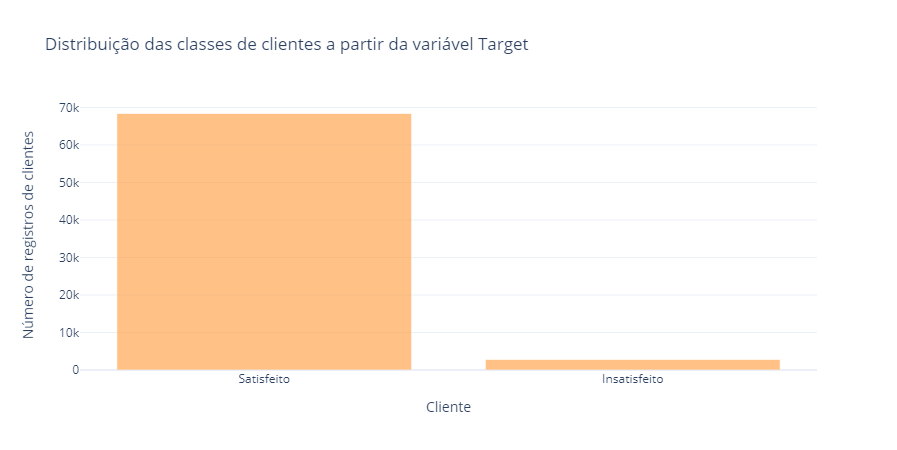

In [ ]:
# Plotando um gráfico de barras, para as variáveis especificadas.

plotBar (
    x     = targetDistribuition.index, 
    y     = targetDistribuition.values, 
    title = 'Distribuição das classes de clientes a partir da variável Target', 
    yaxis = 'Número de registros de clientes', 
    xaxis = 'Cliente'
)

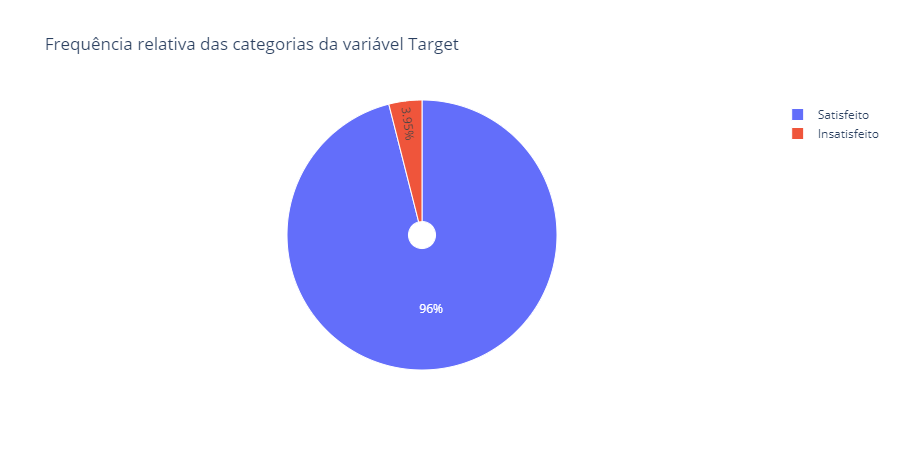

In [ ]:
# Plotando um gráfico de pizza, para a variável especificada.

plotPie (
    data  = targetDistribuition, 
    title = 'Frequência relativa das categorias da variável Target'
)

Cerca de **3,95 %** dos registros são de clientes **insatisfeitos**.

In [ ]:
# Separando a variável target, das features do conjunto de dados.

trainFeatures, trainTarget = dt.drop('TARGET', axis = 1), np.array(dt.TARGET).ravel()

### **3.5 Visão geral dos dados do dataset de teste**

In [ ]:
# Eliminando a variável ID, do dataset de teste.

testFeatures = dataTest.drop('ID', axis = 1)

# Capturando a variável ID, do dataset de teste.

testID = dataTest.ID

In [ ]:
# Verificando as dimensões do dataset de teste.

testFeatures.shape

(75818, 369)

Verificamos a existência de **369 variáveis**, e **75.818 observações** dentro do dataset de teste.

In [ ]:
# Verificando o número de IDs duplicados.

testFeatures.duplicated().sum()

4923

Detectamos a existência de **4.923 registros duplicados** dentro do dataset de teste.

In [ ]:
# Verificando o tipo de dados, das variáveis do dataset.

testFeatures.dtypes.value_counts()

int64      259
float64    110
dtype: int64

Todas as variáveis do conjunto de dados de teste, foram classificadas como sendo do tipo de dado **numérico**.

In [ ]:
# Verificando o número de NAs existentes, dentro do dataset de teste.

testFeatures.isna().sum().sum()

0

**Não há valores nulos** dentro do conjunto de dados.

## **4. Feature Selection**

### **4.1 Criando funções auxiliares**

Iremos definir algumas funções, para aplicar diferentes escalas aos dados e para utilizar a técnica *PCA*.

In [ ]:
# Definindo uma função para para aplicar as transformações MinMaxScaler, StandardScaler, 
# Yeo-Johnson e Normalize as features de um conjunto de dados de treino e de teste.

def dataTransform(train, test, transform = 'MM'):

    # Criando cópias dos DataFrames.

    trainFeatures = train.copy()
    testFeatures  = test.copy()
    
    # Criando uma variável para identificar os dados de treino e de teste.

    trainFeatures['train'] = 1
    testFeatures['train']  = 0

    # Unindo dados de treino e de teste em um único conjunto de dados.

    features = pd.concat([trainFeatures, testFeatures])

    # Capturando a variável que identifica os dados de treino e de teste.

    train = features['train']

    # Eliminando a variável de identificação do Dataframe.

    features = features.drop('train', axis = 1)

    # Criando variável para armazenar o conjunto de dados transformado.

    featuresTransformed = None

    # Aplicando a transformação selecionada.

    if transform == 'MM':
        
        # Criando um objeto da classe MinMaxScaler().

        scaler = MinMaxScaler()

        # Aplicando a escala nas Features e capturando o resultado obtido.

        featuresTransformed = scaler.fit_transform(features)

        # Criando um DataFrame com os resultados obtidos.

        featuresTransformed = pd.DataFrame(data = featuresTransformed, columns = features.columns)
    
    elif transform == 'SS':

        # Criando um objeto da classe StandardScaler().

        scaler = StandardScaler()

        # Aplicando a escala nas Features e capturando o resultado obtido.

        featuresTransformed = scaler.fit_transform(features)

        # Criando um DataFrame com os resultados obtidos.

        featuresTransformed = pd.DataFrame(data = featuresTransformed, columns = features.columns)
    
    elif transform == 'ND':

        # Criando um objeto da classe StandardScaler().

        scaler = StandardScaler()

        # Aplicando a escala nas Features e capturando o resultado obtido.

        featuresTransformed = scaler.fit_transform(features)

        # Criando um DataFrame com os resultados obtidos.

        featuresTransformed = pd.DataFrame(data = featuresTransformed, columns = features.columns)

        # Criando um objeto da classe PowerTransformer().

        scaler = PowerTransformer(method = 'yeo-johnson', standardize = False)

        # Aplicando a escala nas Features e capturando o resultado obtido.

        featuresTransformed = scaler.fit_transform(featuresTransformed)

        # Criando um DataFrame com os resultados obtidos.

        featuresTransformed = pd.DataFrame(data = featuresTransformed, columns = features.columns)
    
    elif transform == 'N':

        # Normalizando cada feature para uma unidade uniforme (vetor unitário).

        featuresTransformed = normalize(features, axis = 0)

        # Criando um DataFrame com os resultados obtidos.

        featuresTransformed = pd.DataFrame(data = featuresTransformed, columns = features.columns)

    # Atribuindo variável identificadora ao DataFrame transformado.

    featuresTransformed['train'] = train.values

    # Separando dados de treino e de teste transformados.

    trFeatures  = featuresTransformed[featuresTransformed['train'] == 1].drop('train', axis = 1)
    tstFeatures = featuresTransformed[featuresTransformed['train'] == 0].drop('train', axis = 1)

    # Retornando dados de treino e teste transformados.

    return trFeatures, tstFeatures

In [ ]:
# Definindo função para aplicar a técnica PCA a um conjunto de dados de treino e teste.

def pcaTransform(train, test, nComponents = 5):

    # Criando cópias dos DataFrames.

    trainFeatures = train.copy()
    testFeatures  = test.copy()
    
    # Criando um variável para identificar os dados de treino e de teste.

    trainFeatures['train'] = 1
    testFeatures['train']  = 0

    # Unindo dados de treino e de teste em um único conjunto de dados.

    features = pd.concat([trainFeatures, testFeatures])

    # Capturando a variável que identifica os dados de treino e de teste.

    train = features['train']

    # Eliminando a variável de identificação do Dataframe.

    features = features.drop('train', axis = 1)

    # Criando variável para armazenar o conjunto de dados transformados.

    featuresTransformed = None

    # Normalizando cada feature para uma unidade uniforme (vetor unitário).

    featuresTransformed = normalize(features, axis = 0)

    # Instanciando um objeto da classe PCA para criar os componentes.

    pca = PCA(n_components = nComponents)

    # Capturando os componentes.

    featuresTransformed = pca.fit_transform(featuresTransformed)

    # Criando um DataFrame com os resultados obtidos.

    featuresTransformed = pd.DataFrame(data = featuresTransformed, columns = ['PCA_' + str(i) for i in range(0, nComponents)])

    # Atribuindo variável identificadora ao DataFrame transformado.

    featuresTransformed['train'] = train.values

    # Separando dados de treino e de teste transformados.

    trFeatures  = featuresTransformed[featuresTransformed['train'] == 1].drop('train', axis = 1)
    tstFeatures = featuresTransformed[featuresTransformed['train'] == 0].drop('train', axis = 1)

    # Retornando dados de treino e teste transformados.

    return trFeatures, tstFeatures

### **4.2 Aplicando diferentes escalas as Features de Treino**

In [ ]:
# Criando um objeto da classe MinMaxScaler().

scaler = MinMaxScaler()

# Aplicando a escala nas Features e capturando o resultado obtido.

trainFeaturesMM = scaler.fit_transform(trainFeatures)

# Criando um DataFrame com os resultados obtidos.

trainFeaturesMM = pd.DataFrame(data = trainFeaturesMM, columns = trainFeatures.columns)

In [ ]:
# Criando um objeto da classe StandardScaler().

scaler = StandardScaler()

# Aplicando a escala nas Features e capturando o resultado obtido.

trainFeaturesStandScaler = scaler.fit_transform(trainFeatures)

# Criando um DataFrame com os resultados obtidos.

trainFeaturesStandScaler = pd.DataFrame(data = trainFeaturesStandScaler, columns = trainFeatures.columns)

In [ ]:
# Criando um objeto da classe StandardScaler().

scaler = PowerTransformer(method = 'yeo-johnson', standardize = False)

# Aplicando a escala nas Features e capturando o resultado obtido.

trainFeaturesNormDistribuition = scaler.fit_transform(trainFeaturesStandScaler)

# Criando um DataFrame com os resultados obtidos.

trainFeaturesNormDistribuition = pd.DataFrame(data = trainFeaturesNormDistribuition, columns = trainFeatures.columns)

In [ ]:
# Normalizando cada feature para uma unidade uniforme (vetor unitário).

trainFeaturesNormalized = normalize(trainFeatures, axis = 1)

# Criando um DataFrame com os resultados obtidos.

trainFeaturesNormalized = pd.DataFrame(data = trainFeaturesNormalized, columns = trainFeatures.columns)

### **4.3 Aplicando técnicas de Features Selection**

Aplicaremos diferentes técnicas de *Feature Selection*, para determinar qual é a melhor combinação de variáveis preditoras a ser utilizada.

#### **4.3.1 SelectKBest**

Este método seleciona recursos de acordo com as **k** pontuações mais altas.

In [ ]:
# Definindo qual conjunto de dados, já escalado, deve ser utilizado.

tFeatures = trainFeaturesMM

# Instanciando um objeto da classe SelectKBest para selecionar as 5 melhores variáveis preditoras.

skb = SelectKBest(chi2, k = 5)

# Capturando as melhores variáveis preditoras.

bestFeatuesSKB = skb.fit_transform(tFeatures, trainTarget)

# Capturando o nome das melhores variáveis preditoras.

bfSkb = tFeatures.columns[skb.get_support()]

# Exibindo o nome das melhores variáveis preditoras.

bfSkb

Index(['ind_var5', 'ind_var8_0', 'ind_var30', 'var36', 'num_meses_var5_ult3'], dtype='object')

In [ ]:
# Criando um DataFrame com os scores obtidos para cada uma das Features segundo a técnica utilizada.

sc = pd.DataFrame(skb.scores_, index = tFeatures.columns, columns = ['score'])

# Capturando os scores das melhores variáveis preditoras.

sc = sc[skb.get_support()]

# Ordenando o Dataframe com os scores.

sc = sc.sort_values(by = 'score', ascending = False)

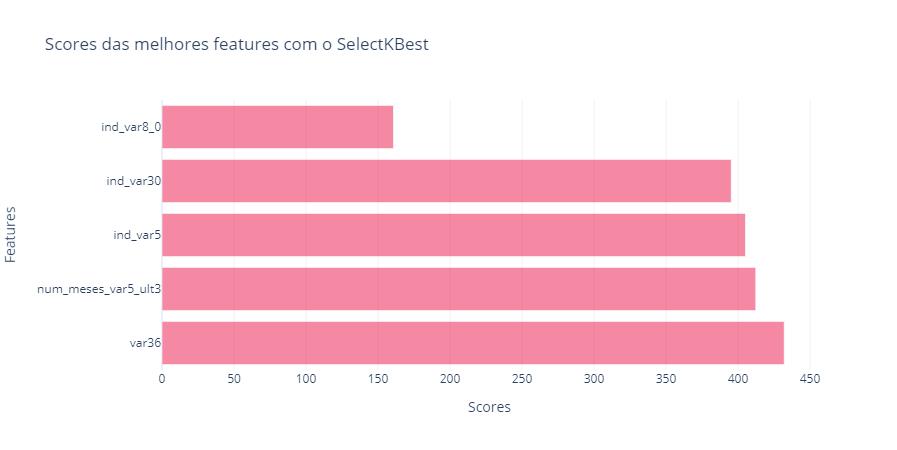

In [ ]:
# Plotando gráfico de barras para as 5 features que obtiveram o maior score com a técnica de feature selection utilizada.

plotBar (
    x           = sc.score.values, 
    y           = sc.index, 
    title       = 'Scores das melhores features com o SelectKBest', 
    yaxis       = 'Features', 
    xaxis       = 'Scores', 
    orientation = 'h'
)

#### **4.3.2 Information Gain**

O **Information gain ou Mutual information** mede quanta informação a *presença / ausência* de um recurso contribui para fazer a previsão correta da variável *target*.

In [ ]:
# Definindo qual conjunto de dados, já escalado, deve ser utilizado.

tFeatures = trainFeaturesMM

# Instanciando um objeto da classe mutual_info_classif.

bestFeatuesIG = mutual_info_classif(tFeatures, trainTarget, discrete_features = 'auto', n_neighbors = 3)

# Inserindo Scores obtidos em um DataFrame.

scoreFeatures = pd.DataFrame(bestFeatuesIG, index = tFeatures.columns,  columns = ['score'])

# Capturando as 5 variáveis com os maiores scores.

bfIg = scoreFeatures.sort_values(by='score', ascending=False).head(5)

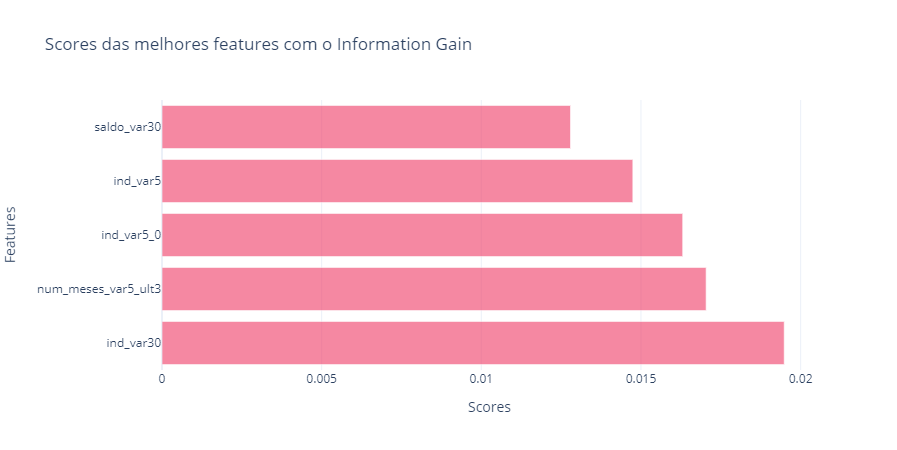

In [ ]:
# Plotando gráfico de barras para as 5 features que obtiveram o maior score com a técnica de feature selection utilizada.

plotBar (
    x           = bfIg.score.values, 
    y           = bfIg.index, 
    title       = 'Scores das melhores features com o Information Gain', 
    yaxis       = 'Features', 
    xaxis       = 'Scores', 
    orientation = 'h'
)

In [ ]:
# Capturando o nome das 5 variáveis com os maiores scores.

bfIg = bfIg.index

# Exibindo o nome das melhores variáveis preditoras.

bfIg

Index(['ind_var30', 'num_meses_var5_ult3', 'ind_var5_0', 'ind_var5',
       'saldo_var30'],
      dtype='object')

#### **4.3.3 ANOVA F-value**

Se os recursos forem categóricos, calcularemos uma **estatística qui-quadrado** entre cada recurso e a variável *target*. No entanto, se os recursos forem quantitativos, calcularemos a **ANOVA F-Value** entre cada recurso e a variável *target*.

As pontuações do **F-Value** examinam se, quando agrupamos a característica numérica pela variável *target*, as médias para cada grupo se tornam significativamente diferentes.

In [ ]:
# Definindo qual conjunto de dados, já escalado, deve ser utilizado.

tFeatures = trainFeaturesMM

# Instanciando um objeto da classe SelectKBest para selecionar as 5 melhores variáveis preditoras a partir 
# do scores ANOVA F-Values.

skb = SelectKBest(f_classif, k = 5)

# Capturando as melhores variáveis preditoras.

bestFeatuesANOVA = skb.fit_transform(tFeatures, trainTarget)

# Capturando o nome das melhores variáveis preditoras.

bfAnova = tFeatures.columns[skb.get_support()]

# Exibindo o nome das melhores variáveis preditoras.

bfAnova

Index(['ind_var5', 'ind_var30', 'num_var30', 'num_var42',
       'num_meses_var5_ult3'],
      dtype='object')

In [ ]:
# Criando um DataFrame com os scores obtidos para cada uma das Features segundo a técnica utilizada.

sc = pd.DataFrame(skb.scores_, index = tFeatures.columns, columns = ['score'])

# Capturando os scores das melhores variáveis preditoras.

sc = sc[skb.get_support()]

# Ordenando o Dataframe com os scores.

sc = sc.sort_values(by = 'score', ascending = False)

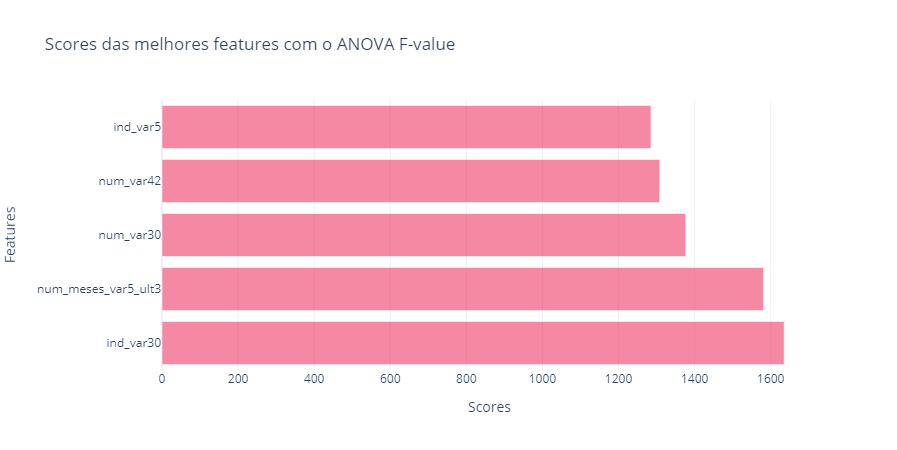

In [ ]:
# Plotando gráfico de barras para as 5 features que obtiveram o maior score com a técnica de feature selection utilizada.

plotBar (
    x           = sc.score.values, 
    y           = sc.index, 
    title       = 'Scores das melhores features com o ANOVA F-value', 
    yaxis       = 'Features', 
    xaxis       = 'Scores', 
    orientation = 'h'
)

#### **4.3.4 Forward Selection**

O **Forward Selection** é um método iterativo, no qual começamos sem ter nenhum recurso no modelo. A cada iteração, adicionamos uma variável que melhora o modelo e efetuamos este procedimento até que a performance do modelo pare de evoluir.

A seleção de recursos começa avaliando todas as variáveis **individualmente**, e seleciona aquela que gera o algoritmo com o melhor desempenho, de acordo com um critério de avaliação predefinido. Em seguida, se avalia todas as combinações possíveis **das variáveis já selecionadas e dos recursos ainda não escolhidos** para definir a combinação que produz o algoritmo com a melhor performance, com base nos mesmos critérios predefinidos.

In [ ]:
# Definindo qual conjunto de dados, já escalado, deve ser utilizado.

tFeatures = trainFeaturesMM

# Instanciando um objeto da classe SFS para selecionar as 5 melhores variáveis preditoras segundo sua acurácia, 
# utilizando o algoritmo XGBClassifer.

sfs = SFS (
    estimator  = xgb.XGBClassifier(), 
    k_features = 5,
    forward    = True, 
    floating   = False, 
    verbose    = 2,
    scoring    = 'roc_auc',
    cv         = 3
)

# Capturando as melhores variáveis preditoras.

sfs = sfs.fit(
    X = tFeatures, 
    y = trainTarget
)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 256 out of 256 | elapsed: 11.4min finished

[2020-10-02 19:50:35] Features: 1/5 -- score: 0.7170061560150698[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 255 out of 255 | elapsed: 16.9min finished

[2020-10-02 20:07:28] Features: 2/5 -- score: 0.81488512998712[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 254 out of 254 | elapsed: 19.0min finished

[2020-10-02 20:26:26] Features: 3/5 -- score: 0.8224274338048314[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 ou

In [ ]:
# Capturando o nome das melhores variáveis preditoras.

bfSfs = tFeatures.columns[list(sfs.k_feature_idx_)]

# Exibindo o nome das melhores variáveis preditoras.

bfSfs

Index(['var15', 'imp_op_var39_ult1', 'saldo_var30', 'saldo_medio_var5_hace2',
       'var38'],
      dtype='object')

In [ ]:
# Capturando os resultados gerados obtidos pela Técnica Forward Selection.

sc = pd.DataFrame(sfs.get_metric_dict())

# Capturando os scores e o nome das Features geradas a cada busca.

sc = sc.loc[['cv_scores', 'feature_names'], :].transpose()

# Capturando o nome das features utilizadas em cada avaliação.

featureNames = sc.feature_names

# Criando índices com o número de Features utilizadas em cada avaliação.

sc.index = [str(i) + ' feature selected' for i in range(1, sc.shape[0] + 1)]

# Remodelando os dados do DataFrame para serem plotados.

sc = pd.DataFrame (
    data    = sc.cv_scores.values,                      # Definindo os scores das features.
    index   = sc.index,                                 # Defindo o número de Features selecionadas. 
    columns = ['score']                                 # Definindo o nome das colunas.
).transpose()                                           # Transpondo DataFrame.

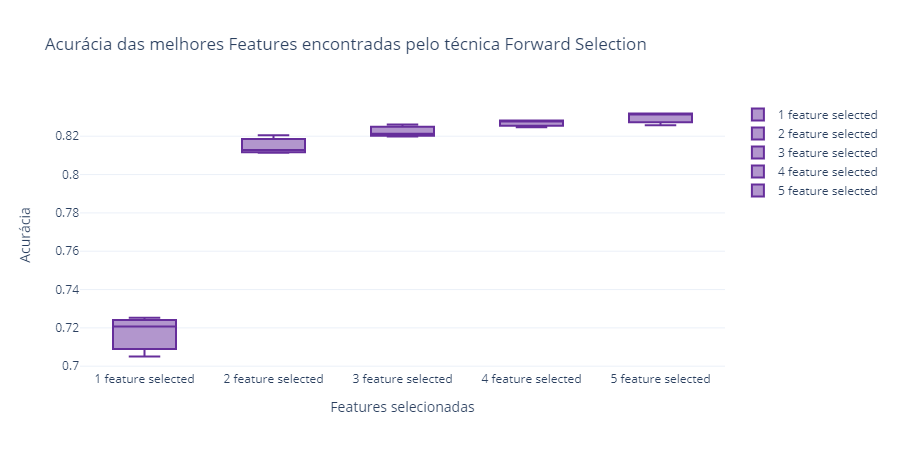

In [ ]:
# Plotando os scores da acurácia obtida pelas features selecionadas em cada fase de busca segundo a técnica Forward Selection.

plotBoxplot (
    data   = sc,
    title  = 'Acurácia das melhores Features encontradas pelo técnica Forward Selection',
    xaxis  = 'Features selecionadas',
    color  = '#662E9B',
    scores = True
)

In [ ]:
# Transpondo DataFrame.

sc = sc.transpose()

# Criando uma nova coluna com os nomes das Features utilizadas em cada avaliação no DataFrame.

sc['featuresNames'] = [', '.join(f) for f in featureNames]

# Exibindo o nome das features utilizadas em cada avaliação.

sc[['featuresNames']]

featuresNames
1 feature selected                                        saldo_var30
2 feature selected                                 var15, saldo_var30
3 feature selected                          var15, saldo_var30, var38
4 feature selected       var15, imp_op_var39_ult1, saldo_var30, var38
5 feature selected  var15, imp_op_var39_ult1, saldo_var30, saldo_m...

#### **4.3.5 Extra Trees Classifier**

O **Extremely Randomized Trees Classifier (Extra Trees Classifier)** é um tipo de técnica de aprendizagem de conjunto que agrega os resultados de várias árvores de decisão descorrelacionadas coletadas em uma “floresta” para produzir seu resultado de classificação. Em conceito, é muito semelhante a um **Classificador Random Forest** e só difere na forma de construção das árvores de decisão na floresta.

Cada árvore de decisão na floresta de árvores extras é construída a partir da amostra de treinamento original. Então, em cada nó de teste, cada árvore é fornecida com uma amostra aleatória de k recursos do conjunto de recursos a partir do qual cada árvore de decisão deve selecionar o melhor recurso para dividir os dados com base em alguns critérios matemáticos (normalmente o *índice de Gini*). Essa amostra aleatória de recursos leva à criação de várias árvores de decisão não correlacionadas.

Para realizar a seleção de características usando a estrutura de floresta acima, durante a construção da floresta, para cada característica, a redução total normalizada nos critérios matemáticos usados ​​na decisão da característica de divisão (**Índice de Gini** se o *Índice de Gini* for usado na construção de floresta) é computado. Esse valor é chamado de **Importância Gini** do recurso. Para realizar a seleção de recursos, cada recurso é ordenado em ordem decrescente de acordo com a Importância Gini de cada recurso e o usuário seleciona os **k** principais recursos de acordo com sua escolha.

In [ ]:
# Definindo qual conjunto de dados, já escalado, deve ser utilizado.

tFeatures = trainFeaturesMM

# Instanciando um objeto da classe ExtraTreesClassifier.

modelETC = ExtraTreesClassifier()

# Computando o score de cada feature.

modelETC.fit (
    X = tFeatures, 
    y = trainTarget
)

# Inserindo Scores obtidos em um DataFrame.

featuresImpETC = pd.DataFrame(data = modelETC.feature_importances_, index = tFeatures.columns, columns = ['score'])

# Capturando as 5 variáveis com os maiores scores.

bfEtc = featuresImpETC.sort_values(by = 'score', ascending = False).head(5)

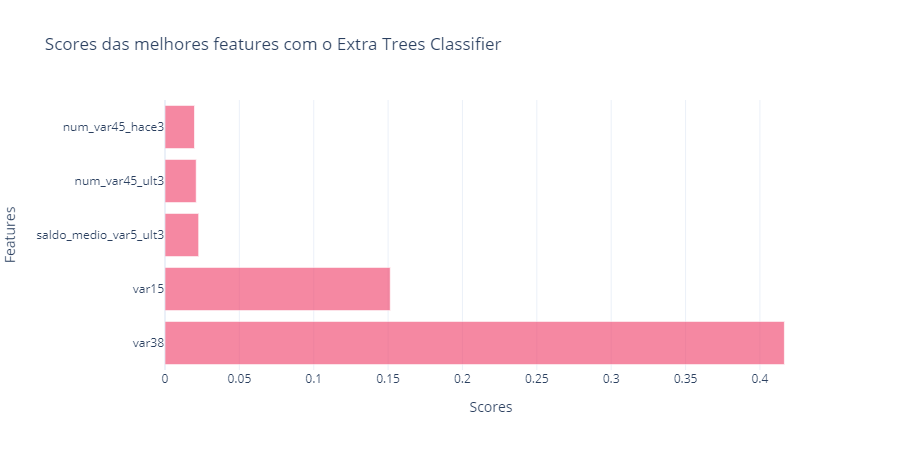

In [ ]:
# Plotando gráfico de barras para as 5 features que obtiveram o maior score com a técnica de feature selection utilizada.

plotBar (
    x           = bfEtc.score.values, 
    y           = bfEtc.index, 
    title       = 'Scores das melhores features com o Extra Trees Classifier', 
    yaxis       = 'Features', 
    xaxis       = 'Scores', 
    orientation = 'h'
)

In [ ]:
# Capturando o nome das 5 variáveis com os maiores scores.

bfEtc = bfEtc.index

# Exibindo o nome das melhores variáveis preditoras.

bfEtc

Index(['var38', 'var15', 'saldo_medio_var5_ult3', 'num_var45_ult3',
       'num_var45_hace3'],
      dtype='object')

#### **4.3.6 Random Forest Importance**


O **Random Forest**, é um dos algoritmos de aprendizado de máquina mais populares. É um dos mais bem-sucedidos porque fornece, em geral, um bom desempenho preditivo, baixo *overfitting* e é de fácil interpretabilidade. 

Essa interpretabilidade é dada pela facilidade de se derivar a importância de cada variável na árvore de decisão. Em outras palavras, é fácil calcular o quanto cada variável está contribuindo para a decisão do modelo.

O *Random Forest* consiste em 4-12 centenas de árvores de decisão, cada uma delas construída sobre uma extração aleatória das observações do conjunto de dados e uma extração aleatória das características. Nem toda árvore vê todas as características ou todas as observações, e isso garante que as árvores sejam descorrelacionadas e, portanto, menos sujeitas a sobreajuste. Cada árvore também é uma sequência de perguntas sim-não com base em um único recurso ou em uma combinação de recursos. Em cada nó (isto é em cada questão), os três dividem o conjunto de dados em 2 depósitos, cada um deles hospedando observações que são mais semelhantes entre si e diferentes das do outro bloco. Portanto, a importância de cada recurso é derivada do quão "puro" cada um dos blocos é.

Para classificação, a medida de impureza é a **impureza de Gini** ou o **ganho / entropia de informação**. Para regressão, a medida de impureza é a **variância**. Portanto, ao treinar uma árvore, é possível calcular o quanto cada recurso diminui a impureza. Quanto maior for a diminuição da impureza que um recurso gerar, mais importante ele será. Em florestas aleatórias, a diminuição da impureza de cada recurso pode ser calculada em média entre as árvores para determinar a importância final da variável.

In [ ]:
# Definindo qual conjunto de dados, já escalado, deve ser utilizado.

tFeatures = trainFeaturesMM

# Instanciando um objeto da classe RandomForestClassifier.

rfImp = RandomForestClassifier (
    n_estimators = 200,
    random_state = 0
)

# Treinando o classificador com o conjunto de dados de treino.

rfImp.fit(
    X = tFeatures, 
    y = trainTarget
)

# Prevendo os scores das features dos dados de treino.

pred = rfImp.predict(tFeatures)

# Convertendo os scores para um DataFrame.

featuresImpRf = pd.Series(data = rfImp.feature_importances_, index = tFeatures.columns)

# Capturando as 5 variáveis com os maiores scores.

bfRf = featuresImpRf.nlargest(5)

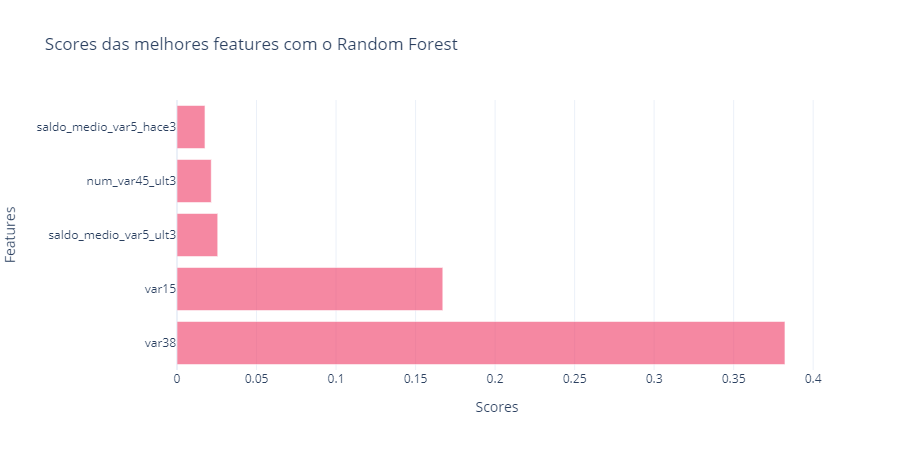

In [ ]:
# Plotando gráfico de barras para as 5 features que obtiveram o maior score com a técnica de feature selection utilizada.

plotBar (
    x           = bfRf.values, 
    y           = bfRf.index, 
    title       = 'Scores das melhores features com o Random Forest', 
    yaxis       = 'Features', 
    xaxis       = 'Scores', 
    orientation = 'h'
)

In [ ]:
# Capturando o nome das 5 variáveis com os maiores scores.

bfRf = bfRf.index

# Exibindo o nome das melhores variáveis preditoras.

bfRf

Index(['var38', 'var15', 'saldo_medio_var5_ult3', 'num_var45_ult3',
       'saldo_medio_var5_hace3'],
      dtype='object')

#### **4.3.7 RFE**

**RFE** é um algoritmo de seleção de recurso do tipo *wrapper*. Isso significa que um algoritmo de aprendizado de máquina diferente é fornecido e usado no núcleo do método, é empacotado pelo RFE e usado para ajudar a selecionar recursos. Isso contrasta com as seleções de recursos com base em filtro que pontuam cada recurso e selecionam os recursos com a maior (ou menor) pontuação.

Tecnicamente, o RFE é um algoritmo de seleção de recursos no estilo wrapper que também usa a seleção de recursos com base em filtro internamente.

O RFE funciona procurando por um subconjunto de recursos começando com todos os recursos no conjunto de dados de treinamento e removendo com sucesso os recursos até que o número desejado permaneça.

Isso é obtido ajustando-se o algoritmo de aprendizado de máquina usado no núcleo do modelo, classificando os recursos por importância, descartando os recursos menos importantes e reajustando o modelo. Este processo é repetido até que um determinado número de recursos permaneça.

Os recursos são pontuados usando o **modelo de aprendizado de máquina fornecido** ou usando um método estatístico.

In [ ]:
# Definindo qual conjunto de dados, já escalado, deve ser utilizado.

tFeatures = trainFeaturesMM

# Instanciando um objeto da classe RFE para selecionar as 5 melhores variáveis preditoras, utilizando o algoritmo XGBClassifer.

rfe = RFE (
    estimator            = xgb.XGBClassifier(), 
    n_features_to_select = 5
)

# Capturando as melhores variáveis preditoras.

rfeFit = rfe.fit (
    X = tFeatures, 
    y = trainTarget
)

In [ ]:
# Capturando o nome das melhores variáveis preditoras.

bfRfe = tFeatures.columns[rfeFit.support_]

# Exibindo o nome das melhores variáveis preditoras.

bfRfe

Index(['var15', 'ind_var8_0', 'num_var42_0', 'saldo_var30',
       'num_meses_var5_ult3'],
      dtype='object')

### **4.4 Avaliando resultados**

In [ ]:
# Criando uma lista, com todos os resultados gerados pelas técnicas de Feature Selection utilizadas.

bestFeaturesNames = [bfSkb.values, bfIg.values, bfAnova.values, bfSfs.values, bfEtc.values, bfRf.values, bfRfe.values]

# Convertendo a lista, para um DataFrame, com as features organizadas em ordem alfabética.

bestFeaturesNamesOrdered = pd.DataFrame (
    data    = [sorted(r) for r in bestFeaturesNames], 
    index   = ['skb', 'ig', 'anova', 'sfs', 'etc', 'rf', 'rfe'],  
    columns = ['Feature' + str(i) for i in range(1, bestFeaturesNames[1].shape[0] +  1)]
)

# Convertendo a lista para um DataFrame.

bestFeaturesNames = pd.DataFrame (
    data    = bestFeaturesNames, 
    index   = ['skb', 'ig', 'anova', 'sfs', 'etc', 'rf', 'rfe'],  
    columns = ['Importance_' + str(i) for i in range(1, bestFeaturesNames[1].shape[0] +  1)]
)

# Exibindo DataFrame, com as features ordenadas segundo seu nível de importância.

bestFeaturesNames

Importance_1  ...            Importance_5
skb       ind_var5  ...     num_meses_var5_ult3
ig       ind_var30  ...             saldo_var30
anova     ind_var5  ...     num_meses_var5_ult3
sfs          var15  ...                   var38
etc          var38  ...         num_var45_hace3
rf           var38  ...  saldo_medio_var5_hace3
rfe          var15  ...     num_meses_var5_ult3

[7 rows x 5 columns]

In [ ]:
# Eliminando resultados duplicados.

bestFeaturesNames = bestFeaturesNames.drop_duplicates()

In [ ]:
# Contabilizando o número de ocorrências de cada uma das features dentro do DataFrame.

bestFeaturesNames.melt().value.value_counts()

var15                     4
num_meses_var5_ult3       4
saldo_var30               3
var38                     3
ind_var30                 3
ind_var5                  3
num_var45_ult3            2
ind_var8_0                2
saldo_medio_var5_ult3     2
imp_op_var39_ult1         1
var36                     1
num_var42                 1
saldo_medio_var5_hace2    1
num_var45_hace3           1
num_var30                 1
ind_var5_0                1
saldo_medio_var5_hace3    1
num_var42_0               1
Name: value, dtype: int64

In [ ]:
# Salvando o DataFrame, com as melhores variáveis selecionadas, pelas técnicas de Feature Selection utilizadas.

bestFeaturesNames.to_csv('/content/outputs/bestFeaturesNames.csv')

## **5. Análise Preditiva**



### **5.1 Criando funções auxiliares**

Iremos definir algumas funções, para executar as etapas de modelagem preditiva.

In [ ]:
# Definindo uma função, para treinar diferentes algoritmos, para prever a variável Target.

def classifiersTraining(features, tTarget, printMeans = True, scoring = 'accuracy'):
    
    # Definindo os valores, para o número de folds e para o seed.
    
    num_folds = 10
    seed      = 100

    # Criando uma lista, para armazenar os modelos que serão utilizados.

    models = []

    # Adicionando os modelos a lista.

    models.append(('LR'     , LogisticRegression()         ))
    models.append(('LDA'    , LinearDiscriminantAnalysis() ))
    models.append(('NB'     , GaussianNB()                 ))
    models.append(('KNN'    , KNeighborsClassifier()       ))
    models.append(('CART'   , DecisionTreeClassifier()     ))
    models.append(('RF'     , RandomForestClassifier()     ))
    models.append(('XGBoost', xgb.XGBClassifier()          ))

    # Criando Listas, para armazenar os resultados e os nomes, de cada um dos algoritmos testados.

    results = []
    names   = []

    # Criando um Dataframe, para armazenar a média e o desvio-padrão, de cada um dos algoritmos testados.

    means   = pd.DataFrame(columns = ['mean', 'std'])

    # Avaliando cada um dos modelos da lista de modelos.

    for name, model in models:
        
        # Instanciando um objeto da Kfold para criar os folds.

        kfold = KFold(n_splits = num_folds, random_state = seed)
        
        # Treinando o modelo com Cross Validation.

        cv_results = cross_val_score(model, features, tTarget, cv = kfold, scoring = scoring)
        
        # Adicionando os resultados gerados a lista de resultados.

        results.append(cv_results)
        
        # Adicionando o nome do modelo avaliado a lista de nomes.

        names.append(name)

        # Adicionando a média e o desvio-padrão dos resultados gerados, pelo modelo analisado ao Dataframe de médias.

        means = means.append(
            pd.DataFrame (
                data    = [[cv_results.mean(), cv_results.std()]], 
                columns = ['mean', 'std'], 
                index   = [name]
            )
        )

        # Imprime uma mensagem, contendo os resultados obtidos, ao fim do treinamento de cada um dos modelos.

        if printMeans:

            # Cria a mensagem a ser impressa.

            msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
            
            # Imprime a mensagem.

            print(msg)

    # Cria um DataFrame, com os resultados obtidos, por cada um dos modelos avaliados.

    results = pd.DataFrame(np.transpose(results), columns = names)

    # Retorna o DataFrame, com os resultados e com as médias geradas.
    
    return (results, means)

In [ ]:
# Definindo uma função, para realizar a plotagem de Confusions Matrix.

def plotConfusionMatrix(data, labels, figsize = (6, 6), fontScale = 1.2, title = 'Confusion Matrix', 
                        xlabel = 'Actual', ylabel = 'Predicted'):

    # Definindo a área de plotagem e suas dimensões.

    _, ax = plt.subplots(figsize = figsize)

    # Definindo o tamanho da fonte utilizada no gráfico.

    sns.set(font_scale = fontScale)

    # Criando Heatmap para representar a Confusion Matrix.

    ax = sns.heatmap (
        data       = data,
        annot      = True,
        cmap       = 'Blues',
        linewidths = 5,
        cbar       = False,
        fmt        = 'd'
    ) 

    # Definindo as labels e o título do gráfico. 

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel) 
    ax.set_title(title)

    # Definindo as ticklabels do gráfico.

    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels);

In [ ]:
# Definindo uma função, para realizar o cálculo do Intervalo de Confiança, da acurácia e do erro de modelos 
# preditivos de classificação.

def CI(score, nElements,  ci = .95):

    # Define o Z-score, a ser utilizado para o Intervalo de Confiança selecionado.
    
    z = {
        .90  : 1.645,      # Para Intervalos com 90% de Confiança.
        .95  : 1.96,       # Para Intervalos com 95% de Confiança.
        .98  : 2.326,      # Para Intervalos com 98% de Confiança.
        .99  : 2.576,      # Para Intervalos com 99% de Confiança.
        .995 : 2.807,      # Para Intervalos com 99.5% de Confiança.
        .999 : 3.291       # Para Intervalos com 99.9% de Confiança.
    }

    # Calculando o range de variação do Intervalo.

    interval = z.get(ci) * np.sqrt( (score * (1 - score)) / nElements)

    # Retornando o Intervalo de Confiança obtido.

    return score - interval, score + interval

In [ ]:
# Definindo uma função, para criar uma Confusion Matrix.

def confusionMatrix(yTrue, yPred, labelPositive = 'Yes', labelNegative = 'No', classError = True):

    # Convertendo arrays para o tipo de dado categórico.

    yTrue = pd.Categorical(values = yTrue, categories = labels)
    yPred = pd.Categorical(values = yPred, categories = labels)

    # Transformando arrays em Séries Temporais.

    yPred = pd.Series(data = yPred, name = 'Predicted')
    yTrue = pd.Series(data = yTrue, name = 'Actual')

    # Criando a Confusion Matrix.

    cm = pd.crosstab(index = yPred, columns = yTrue, dropna = False)

    # Calculando os erros, das classes da Confusion Matrix.

    if classError:
        
        # Capturando cada um dos valores da Confusion Matrix.

        truePositve, falsePositive, falseNegative, trueNegative = np.array(cm).ravel()

        # Criando um DataFrame, contendo os erros das classes.

        ce = pd.DataFrame (
            data = [
                falsePositive / (truePositve + falsePositive),
                1 - trueNegative / (trueNegative + falseNegative)
            ],
            columns = ['classError'],
            index   = labels
        )

        # Inserindo no DataFrame, as colunas da Confusion Matrix.

        for c in range(cm.shape[1] - 1, -1, -1):
            
            # Inserindo as colunas no DataFrame.

            ce.insert(loc = 0, column = labels[c], value = cm[labels[c]])

        # Atribuindo índices e colunas ao DataFrame.
        
        ce.index   = pd.Series(ce.index, name = 'Predicted')
        ce.columns = pd.Series(ce.columns, name = 'Actual')

        # Retornando a Confusion Matrix, com o erro das classes.
        
        return ce

    # Retornando Confusion Matrix.

    return cm

In [ ]:
# Definindo uma função, para calcular as métricas, baseadas na Confusion Matrix.

def getClassificationMetrics(yTrue, predProb, labelPositive = 'Yes', labelNegative = 'No'):

    # Binarizando os scores obtidos nas previsões.
    
    yPred = [labelPositive if v >= 0.5 else labelNegative for v in predProb]
    
    # Convertendo arrays para o tipo categórico.

    labels = [labelPositive, labelNegative]

    yTrue = pd.Categorical(values = yTrue, categories = labels)
    yPred = pd.Categorical(values = yPred, categories = labels)

    # Convertendo arrays para o tipo numérico. 

    yNTrue = [1 if v == labelPositive else 0 for v in yTrue]
    yNPred = [1 if v == labelPositive else 0 for v in yPred]

    # Transformando arrays em Séries Temporais.

    yPred = pd.Series(data = yPred, name = 'Predicted')
    yTrue = pd.Series(data = yTrue, name = 'Actual')

    # Criando a Confusion Matrix.

    cm = confusionMatrix(yTrue, yPred, labelPositive = labelPositive, labelNegative = labelNegative, classError = False)

    # Capturando cada um dos valores da Confusion Matrix.

    truePositve, falsePositive, falseNegative, trueNegative = np.array(cm).ravel()

    # Calculando as métricas.

    accuracy     = accuracy_score(yTrue, yPred)
    accuracyCI   = CI(accuracy_score(yTrue, yPred), len(yTrue))
    kappa        = cohen_kappa_score(yTrue, yPred)
    sensitivity  = recall_score(yNTrue, yNPred)
    specificity  = trueNegative /(trueNegative + falsePositive)
    prevalence   = (truePositve + falseNegative) / len(yTrue)
    ppv          = (sensitivity * prevalence) /((sensitivity * prevalence) + ((1 - specificity) * (1 - prevalence)))
    npv          = (specificity * (1 - prevalence)) / (((1 - sensitivity) * prevalence) + ((specificity) * (1 - prevalence)))
    precision    = precision_score(yNTrue, yNPred)
    avgPrecision = average_precision_score(yNTrue, yNPred)
    dRate        = truePositve / len(yTrue)
    dPrevalence  = (truePositve + falsePositive) / len(yTrue)
    f1           = f1_score(yNTrue, yNPred)
    rocAuc       = roc_auc_score(yNTrue, predProb)
    error        = 1 - accuracy_score(yTrue, yPred)
    errorCI      = CI(error, len(yTrue))
    bAccuracy    = balanced_accuracy_score(yTrue, yPred)

    # Criando um DataFrame, com o resultado das métricas calculadas.

    metrics = pd.DataFrame([{
        'Accuracy'            : accuracy,     # Determina a precisão geral prevista do modelo.
        '95% CI for Accuracy' : accuracyCI,   # Determina um intervalo de confiança de 95% para a acurácia.
        'Kappa'               : kappa,        # Determina o coeficiente de Kappa.
        'Recall (Sensitivity)': sensitivity,  # Determina a proporção de registros positivos que foram classificados 
                                              # pelo algoritmo como positivos.
        'Specificity'         : specificity,  # Determina a proporção de registros negativos que foram classificados 
                                              # pelo algoritmo como negativos.
        'Pos Pred Value'      : ppv,          # Determina a porcentagem de positivos previstos que são realmente positivos.
        'Neg Pred Value'      : npv,          # Determina a porcentagem de negativos previstos que são realmente negativos.
        'Precision'           : precision,    # Determina a proporção de classificações positivas, que realmente são 
                                              # positivas.
        'Avarage Precision'   : avgPrecision, # Determina a precisão como a média ponderada de precisões alcançadas em 
                                              # cada limite.
        'Prevalence'          : prevalence,   # Determina a frequência com que a classe positiva realmente ocorre em nossa 
                                              # amostra.
        'Detection Rate'      : dRate,        # Determina a proporção de classificações positivas feitas corretamente em 
                                              # relação a todas as previsões feitas.
        'Detection Prevalence': dPrevalence,  # Determina o número de previsões positivas como uma proporção de todas
                                              # as previsões.
        'F1'                  : f1,           # Determina a média Harmônica entre a precision e o recall do modelo.
        'ROC AUC'             : rocAuc,       # Determina a medida de separabilidade ROC. Ela indica o quanto o modelo 
                                              # é capaz de distinguir as classes.   
        'Error'               : error,        # Determina o erro do modelo em relação a sua acurácia.
        '95% CI for Error'    : errorCI,      # Determina um intervalo de confiança de 95% para o erro.
        'Balanced Accuracy'   : bAccuracy,    # Determina a acurácia do modelo balanceada pelos tamanhos das classes.
        'Positive Class'      : labelPositive # Define qual classe é a classe positiva.
    }], index = ['Metrics']).transpose()

    # Retornando o DataFrame, com as métricas obtidas.

    return metrics

In [ ]:
# Definindo uma função, para salvar um modelo preditivo já treinado.

def saveModel(name, model, fold = '/content/outputs/', ext = '.sav'):

    # Definindo o diretório e o nome do arquivo que será utilizado para salvar o modelo.

    dir = fold + name + ext

    # Salvando o modelo especificado.

    pickle.dump(model, open(dir, 'wb'))

    # Imprimindo mensagem de sucesso.

    print("Modelo salvo!")

In [ ]:
# Definindo uma função, para carregar um modelo preditivo já treinado.

def loadModel(name, fold = '/content/outputs/', ext = '.sav'):

    # Definindo o diretório e o nome do arquivo que será utilizado para carregar o modelo.

    dir = fold + name + ext

    # Imprimindo mensagem de sucesso.

    print("Modelo carregado!")

    # Carregando o modelo especificado.

    return pickle.load(open(dir, 'rb'))

### **5.2 Criando modelos preditivos e avaliando suas Performances**

In [ ]:
# Carregando o DataFrame, com as variáveis selecionadas, por cada uma das técnicas de Feature Selection.

bestFeaturesNames = pd.read_csv('/content/outputs/bestFeaturesNames.csv', index_col = 0)

#### **5.2.1 Treinando modelos com as Features transformadas pelo algoritmo MinMaxScaler**

In [ ]:
# Treinando classificadores, a partir da escala, e da técnica de Feature Selection utilizada.

resultsMMSkb = classifiersTraining (
    features = trainFeaturesMM[list(bestFeaturesNames.loc['skb'])], 
    tTarget  = trainTarget
)

LR: 0.960471 (0.002493)
LDA: 0.960471 (0.002493)
NB: 0.931866 (0.002663)
KNN: 0.959698 (0.003393)
CART: 0.960457 (0.002498)
RF: 0.960457 (0.002498)
XGBoost: 0.960471 (0.002493)


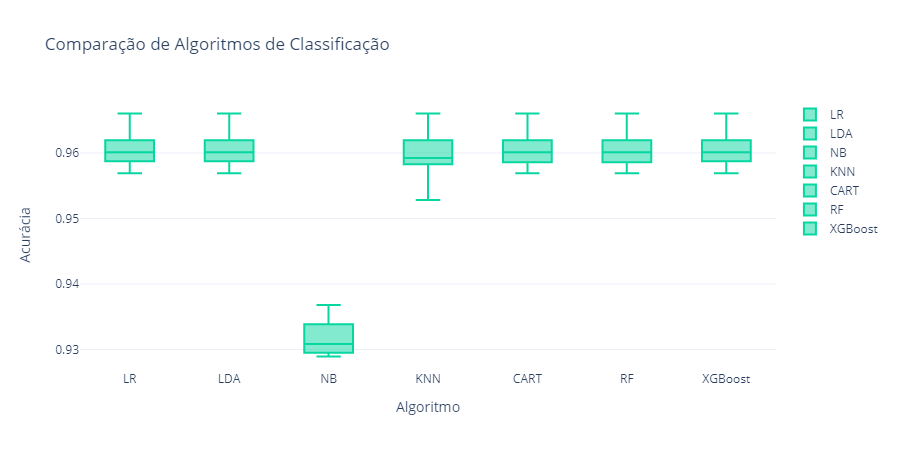

In [ ]:
# Plotando os scores, da acurácia dos classificadores treinados, em boxplots.

plotBoxplot(data = resultsMMSkb[0])

In [ ]:
# Treinando classificadores, a partir da escala, e da técnica de Feature Selection utilizada.

resultsMMIg = classifiersTraining (
    features = trainFeaturesMM[list(bestFeaturesNames.loc['ig'])], 
    tTarget  = trainTarget
)

LR: 0.960471 (0.002493)
LDA: 0.960471 (0.002493)
NB: 0.743011 (0.004555)
KNN: 0.960162 (0.002575)
CART: 0.957101 (0.002780)
RF: 0.957213 (0.002956)
XGBoost: 0.960429 (0.002489)


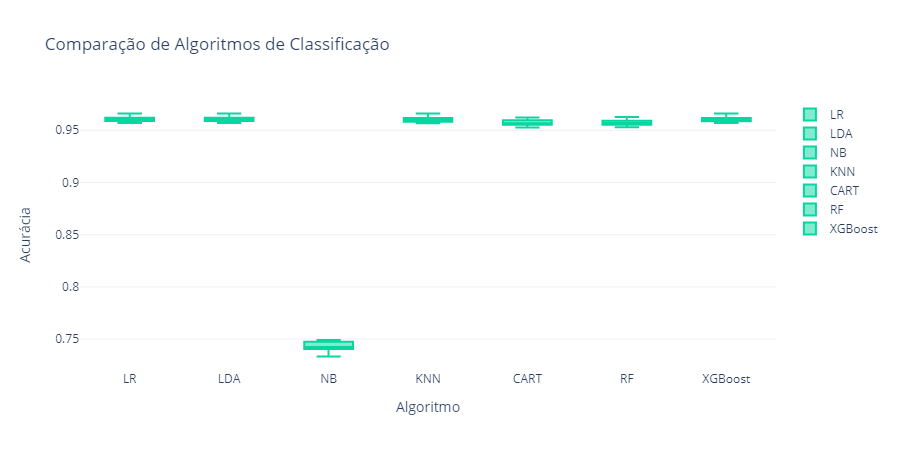

In [ ]:
# Plotando os scores, da acurácia dos classificadores treinados, em boxplots.

plotBoxplot(data = resultsMMIg[0])

In [ ]:
# Treinando classificadores, a partir da escala, e da técnica de Feature Selection utilizada.

resultsMMAnova = classifiersTraining (
    features = trainFeaturesMM[list(bestFeaturesNames.loc['anova'])], 
    tTarget  = trainTarget
)

LR: 0.960471 (0.002493)
LDA: 0.960471 (0.002493)
NB: 0.762937 (0.004551)
KNN: 0.960471 (0.002493)
CART: 0.960443 (0.002476)
RF: 0.960443 (0.002476)
XGBoost: 0.960471 (0.002493)


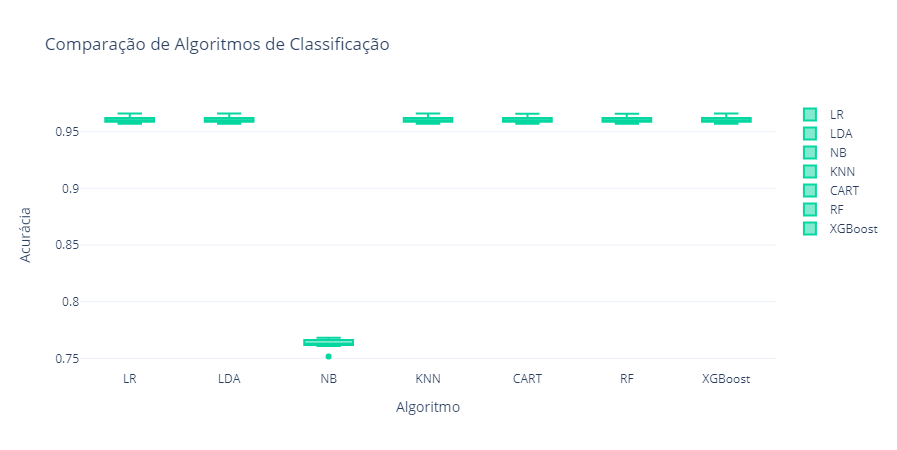

In [ ]:
# Plotando os scores, da acurácia dos classificadores treinados, em boxplots.

plotBoxplot(data = resultsMMAnova[0])

In [ ]:
# Treinando classificadores, a partir da escala, e da técnica de Feature Selection utilizada.

resultsMMSfs = classifiersTraining (
    features = trainFeaturesMM[list(bestFeaturesNames.loc['sfs'])], 
    tTarget  = trainTarget
)

LR: 0.960471 (0.002493)
LDA: 0.960316 (0.002444)
NB: 0.920703 (0.015806)
KNN: 0.957199 (0.002385)
CART: 0.930926 (0.002824)
RF: 0.949209 (0.002113)
XGBoost: 0.960429 (0.002512)


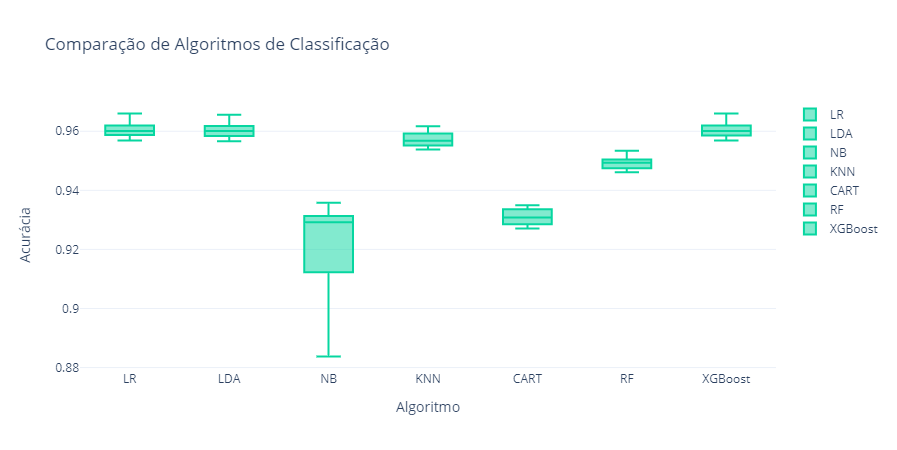

In [ ]:
# Plotando os scores, da acurácia dos classificadores treinados, em boxplots.

plotBoxplot(data = resultsMMSfs[0])

In [ ]:
# Treinando classificadores, a partir da escala, e da técnica de Feature Selection utilizada.

resultsMMEtc = classifiersTraining (
    features = trainFeaturesMM[list(bestFeaturesNames.loc['etc'])], 
    tTarget  = trainTarget
)

LR: 0.960471 (0.002493)
LDA: 0.960471 (0.002493)
NB: 0.940910 (0.005379)
KNN: 0.957676 (0.002060)
CART: 0.928454 (0.002379)
RF: 0.952101 (0.002088)
XGBoost: 0.960457 (0.002492)


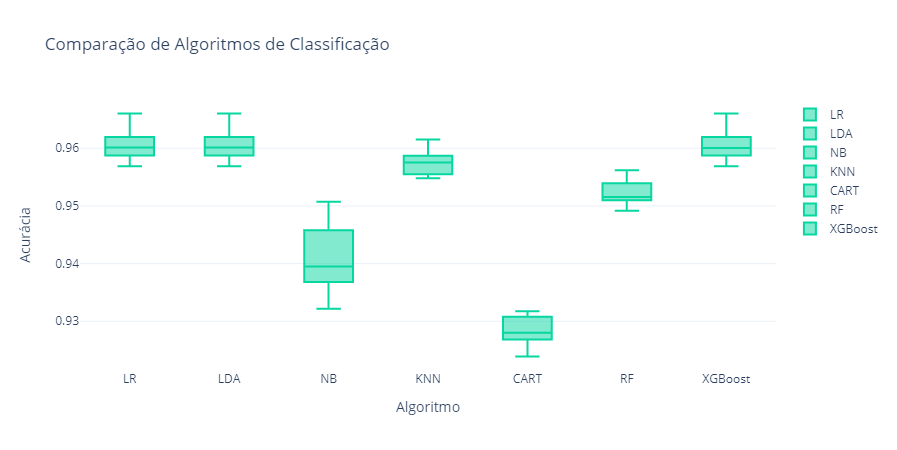

In [ ]:
# Plotando os scores, da acurácia dos classificadores treinados, em boxplots.

plotBoxplot(data = resultsMMEtc[0])

In [ ]:
# Treinando classificadores, a partir da escala, e da técnica de Feature Selection utilizada.

resultsMMRfe = classifiersTraining (
    features = trainFeaturesMM[list(bestFeaturesNames.loc['rfe'])], 
    tTarget  = trainTarget
)

LR: 0.960471 (0.002493)
LDA: 0.959516 (0.002611)
NB: 0.915999 (0.006078)
KNN: 0.957887 (0.003148)
CART: 0.952256 (0.002322)
RF: 0.957269 (0.002807)
XGBoost: 0.960429 (0.002526)


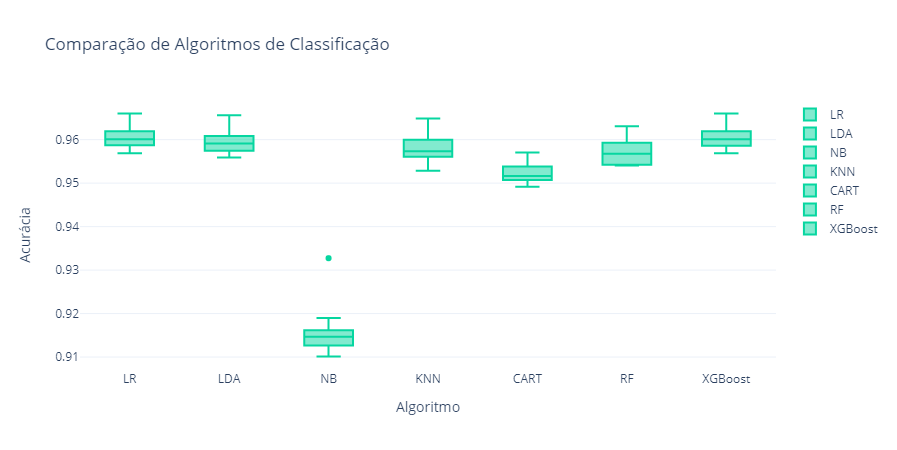

In [ ]:
# Plotando os scores, da acurácia dos classificadores treinados, em boxplots.

plotBoxplot(data = resultsMMRfe[0])

Os algoritmos **Logistc Regression** e **XGBoost**, foram os que obtiveram as melhores acurácias, para o conjunto de dados transformados pelo algoritmo *MinMaxScaler*, em praticamente todos os grupos de *Features* gerados.

#### **5.2.2 Treinando modelos com as Features transformadas pelo algoritmo StandScaler**


In [ ]:
# Treinando classificadores, a partir da escala, e da técnica de Feature Selection utilizada.

resultsSSSkb = classifiersTraining (
    features = trainFeaturesStandScaler[list(bestFeaturesNames.loc['skb'])], 
    tTarget  = trainTarget
)

LR: 0.960471 (0.002493)
LDA: 0.960471 (0.002493)
NB: 0.931866 (0.002663)
KNN: 0.960007 (0.002674)
CART: 0.960457 (0.002498)
RF: 0.960457 (0.002498)
XGBoost: 0.960471 (0.002493)


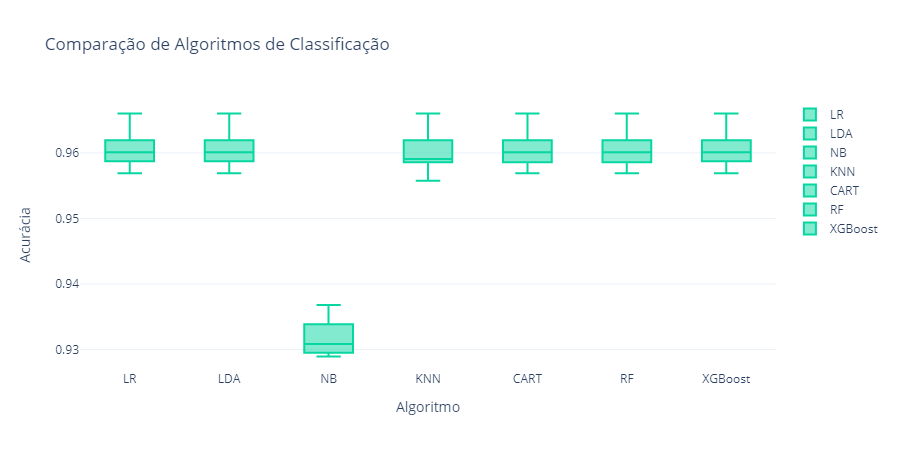

In [ ]:
# Plotando os scores, da acurácia dos classificadores treinados, em boxplots.

plotBoxplot(data = resultsSSSkb[0])

In [ ]:
# Treinando classificadores, a partir da escala, e da técnica de Feature Selection utilizada.

resultsSSIg = classifiersTraining (
    features = trainFeaturesStandScaler[list(bestFeaturesNames.loc['ig'])], 
    tTarget  = trainTarget
)

LR: 0.960471 (0.002493)
LDA: 0.960471 (0.002493)
NB: 0.743011 (0.004555)
KNN: 0.960134 (0.002553)
CART: 0.954292 (0.002298)
RF: 0.954236 (0.002537)
XGBoost: 0.960429 (0.002489)


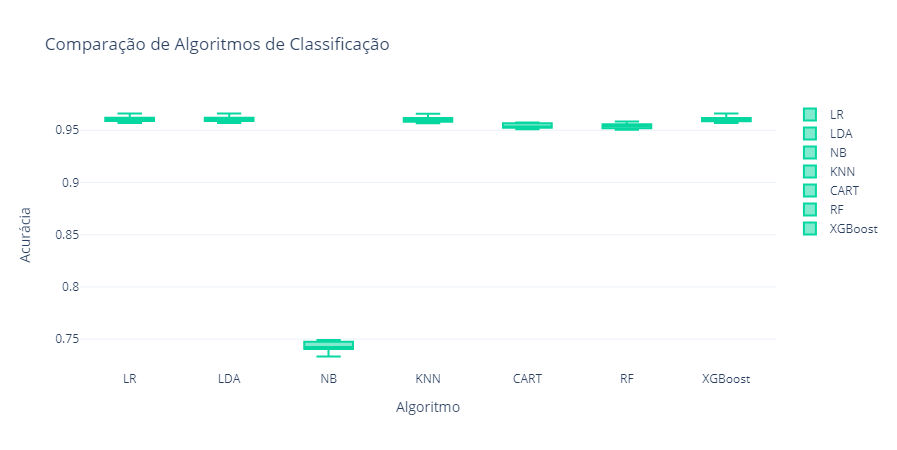

In [ ]:
# Plotando os scores, da acurácia dos classificadores treinados, em boxplots.

plotBoxplot(data = resultsSSIg[0])

In [ ]:
# Treinando classificadores, a partir da escala, e da técnica de Feature Selection utilizada.

resultsSSAnova = classifiersTraining (
    features = trainFeaturesStandScaler[list(bestFeaturesNames.loc['anova'])], 
    tTarget  = trainTarget
)

LR: 0.960471 (0.002493)
LDA: 0.960471 (0.002493)
NB: 0.762937 (0.004551)
KNN: 0.960471 (0.002493)
CART: 0.960443 (0.002476)
RF: 0.960443 (0.002476)
XGBoost: 0.960471 (0.002493)


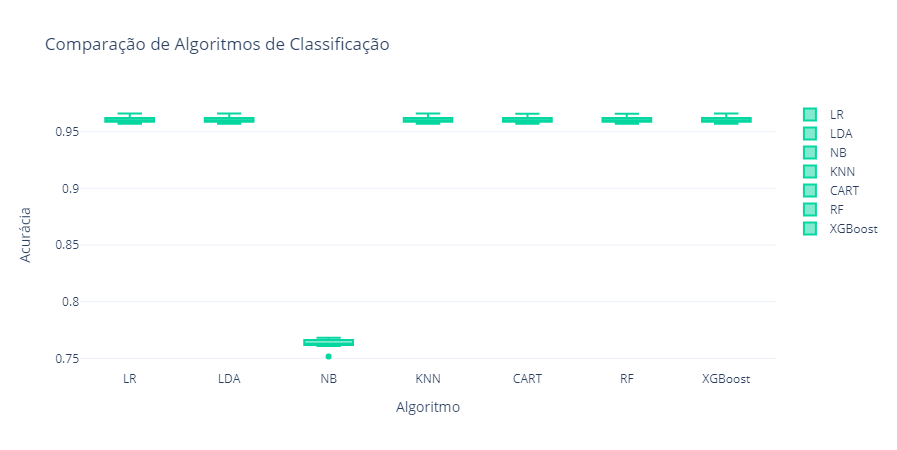

In [ ]:
# Plotando os scores, da acurácia dos classificadores treinados, em boxplots.

plotBoxplot(data = resultsSSAnova[0])

In [ ]:
# Treinando classificadores, a partir da escala, e da técnica de Feature Selection utilizada.

resultsSSSfs = classifiersTraining (
    features = trainFeaturesStandScaler[list(bestFeaturesNames.loc['sfs'])], 
    tTarget  = trainTarget
)

LR: 0.960401 (0.002513)
LDA: 0.960316 (0.002444)
NB: 0.920703 (0.015806)
KNN: 0.957297 (0.002327)
CART: 0.930715 (0.002107)
RF: 0.948380 (0.002196)
XGBoost: 0.960429 (0.002512)


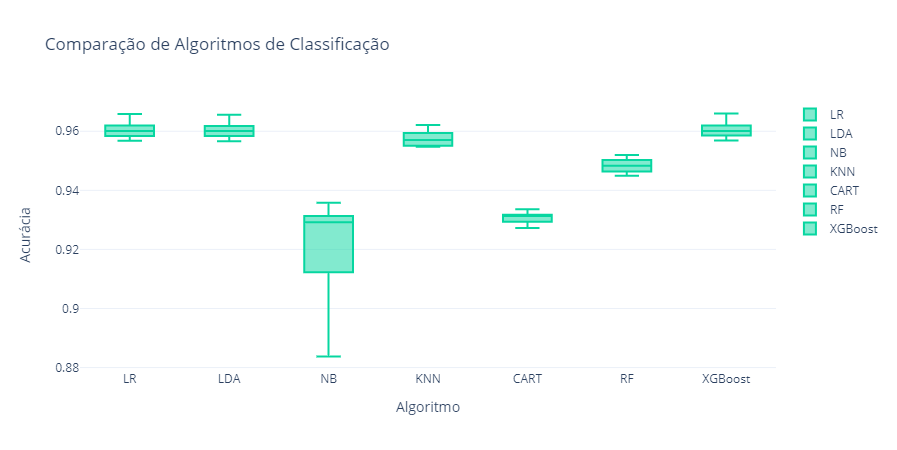

In [ ]:
# Plotando os scores, da acurácia dos classificadores treinados, em boxplots.

plotBoxplot(data = resultsSSSfs[0])

In [ ]:
# Treinando classificadores, a partir da escala, e da técnica de Feature Selection utilizada.

resultsSSEtc = classifiersTraining (
    features = trainFeaturesStandScaler[list(bestFeaturesNames.loc['etc'])], 
    tTarget  = trainTarget
)

LR: 0.960471 (0.002493)
LDA: 0.960471 (0.002493)
NB: 0.940910 (0.005379)
KNN: 0.957676 (0.002039)
CART: 0.928033 (0.001147)
RF: 0.951554 (0.001910)
XGBoost: 0.960457 (0.002492)


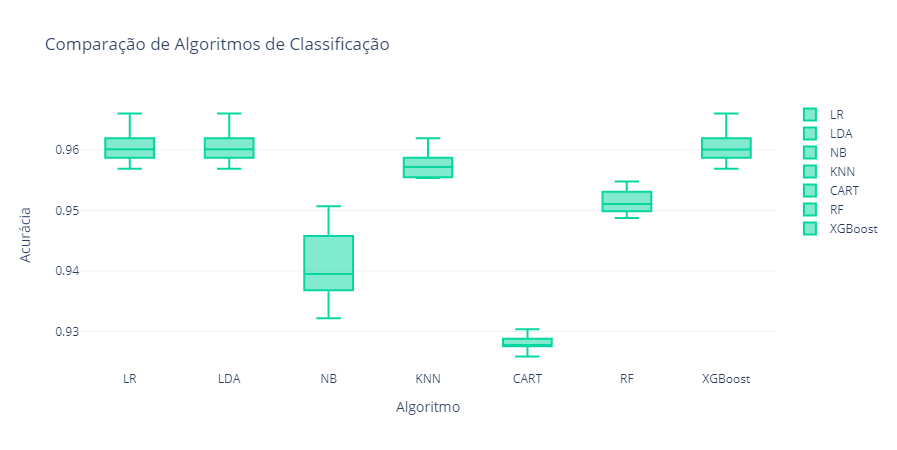

In [ ]:
# Plotando os scores, da acurácia dos classificadores treinados, em boxplots.

plotBoxplot(data = resultsSSEtc[0])

In [ ]:
# Treinando classificadores, a partir da escala, e da técnica de Feature Selection utilizada.

resultsSSRfe = classifiersTraining (
    features = trainFeaturesStandScaler[list(bestFeaturesNames.loc['rfe'])], 
    tTarget  = trainTarget
)

LR: 0.960457 (0.002444)
LDA: 0.959516 (0.002611)
NB: 0.915999 (0.006078)
KNN: 0.957087 (0.004114)
CART: 0.950908 (0.003059)
RF: 0.957044 (0.002708)
XGBoost: 0.960429 (0.002526)


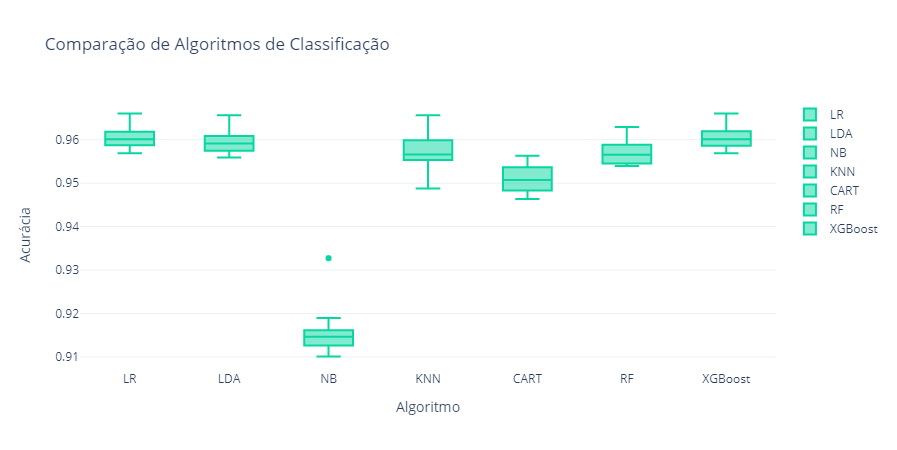

In [ ]:
# Plotando os scores, da acurácia dos classificadores treinados, em boxplots.

plotBoxplot(data = resultsSSRfe[0])

Os algoritmos **Logistc Regression**, **LDA** e **XGBoost**, foram os que obtiveram as melhores acurácias, para o conjunto de dados transformados pelo algoritmo *StandardScaler*, em praticamente todos os grupos de *Features* gerados.

#### **5.2.3 Treinando modelos com as Features transformadas pelo algoritmo Box-Cox**


In [ ]:
# Treinando classificadores, a partir da escala, e da técnica de Feature Selection utilizada.

resultsNDSkb = classifiersTraining (
    features = trainFeaturesNormDistribuition[list(bestFeaturesNames.loc['skb'])], 
    tTarget  = trainTarget
)

LR: 0.960471 (0.002493)
LDA: 0.960471 (0.002493)
NB: 0.931866 (0.002663)
KNN: 0.960471 (0.002508)
CART: 0.960457 (0.002498)
RF: 0.960457 (0.002498)
XGBoost: 0.960471 (0.002493)


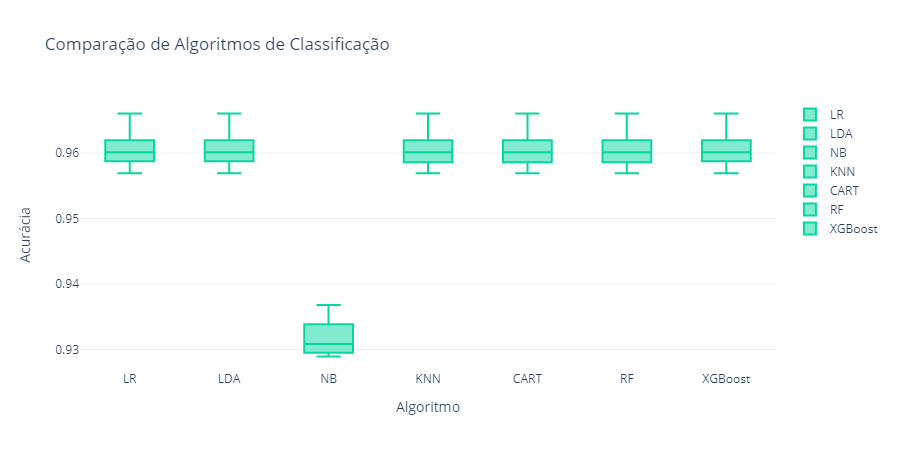

In [ ]:
# Plotando os scores, da acurácia dos classificadores treinados, em boxplots.

plotBoxplot(data = resultsNDSkb[0])

In [ ]:
# Treinando classificadores, a partir da escala, e da técnica de Feature Selection utilizada.

resultsNDIg = classifiersTraining (
    features = trainFeaturesNormDistribuition[list(bestFeaturesNames.loc['ig'])], 
    tTarget  = trainTarget
)

LR: 0.960471 (0.002493)
LDA: 0.960471 (0.002493)
NB: 0.932498 (0.002579)
KNN: 0.960106 (0.002612)
CART: 0.954334 (0.002463)
RF: 0.954264 (0.002672)
XGBoost: 0.960429 (0.002489)


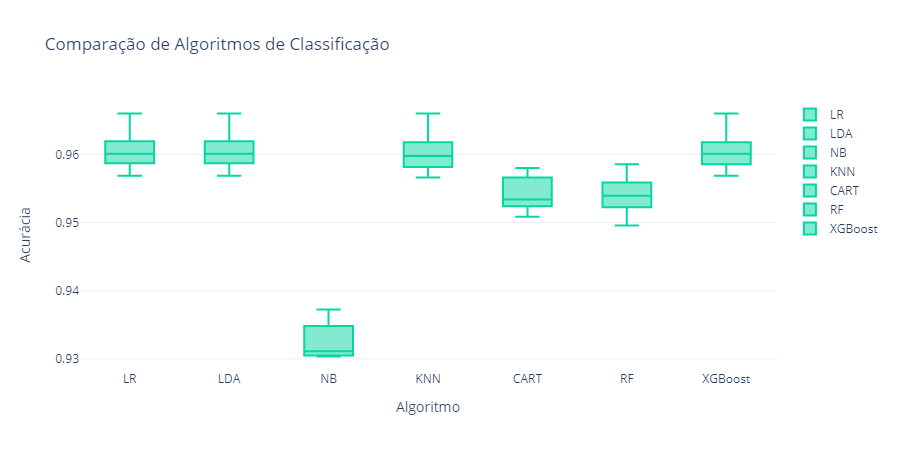

In [ ]:
# Plotando os scores, da acurácia dos classificadores treinados, em boxplots.

plotBoxplot(data = resultsNDIg[0])

In [ ]:
# Treinando classificadores, a partir da escala, e da técnica de Feature Selection utilizada.

resultsNDAnova = classifiersTraining (
    features = trainFeaturesNormDistribuition[list(bestFeaturesNames.loc['anova'])], 
    tTarget  = trainTarget
)

LR: 0.960471 (0.002493)
LDA: 0.960471 (0.002493)
NB: 0.762937 (0.004551)
KNN: 0.960330 (0.002284)
CART: 0.960443 (0.002476)
RF: 0.960443 (0.002476)
XGBoost: 0.960471 (0.002493)


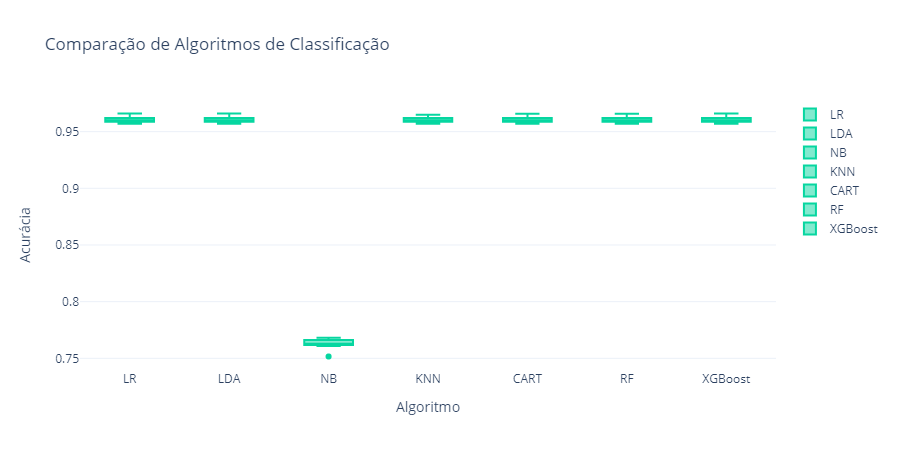

In [ ]:
# Plotando os scores, da acurácia dos classificadores treinados, em boxplots.

plotBoxplot(data = resultsNDAnova[0])

In [ ]:
# Treinando classificadores, a partir da escala, e da técnica de Feature Selection utilizada.

resultsNDSfs = classifiersTraining (
    features = trainFeaturesNormDistribuition[list(bestFeaturesNames.loc['sfs'])], 
    tTarget  = trainTarget
)

LR: 0.960471 (0.002493)
LDA: 0.960471 (0.002493)
NB: 0.960471 (0.002493)
KNN: 0.956918 (0.002589)
CART: 0.930926 (0.002481)
RF: 0.948759 (0.002194)
XGBoost: 0.960429 (0.002533)


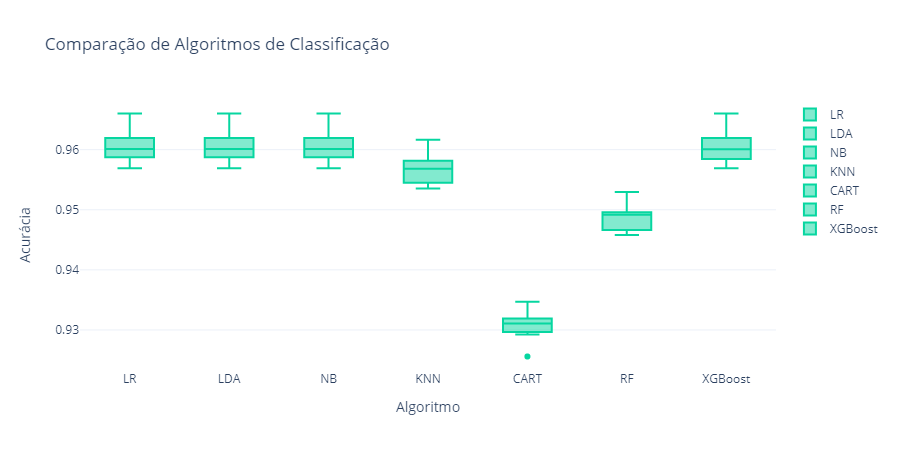

In [ ]:
# Plotando os scores, da acurácia dos classificadores treinados, em boxplots.

plotBoxplot(data = resultsNDSfs[0])

In [ ]:
# Treinando classificadores, a partir da escala, e da técnica de Feature Selection utilizada.

resultsNDEtc = classifiersTraining (
    features = trainFeaturesNormDistribuition[list(bestFeaturesNames.loc['etc'])], 
    tTarget  = trainTarget
)

LR: 0.960471 (0.002493)
LDA: 0.960471 (0.002493)
NB: 0.960471 (0.002493)
KNN: 0.957410 (0.002347)
CART: 0.928468 (0.001400)
RF: 0.951750 (0.001773)
XGBoost: 0.960457 (0.002492)


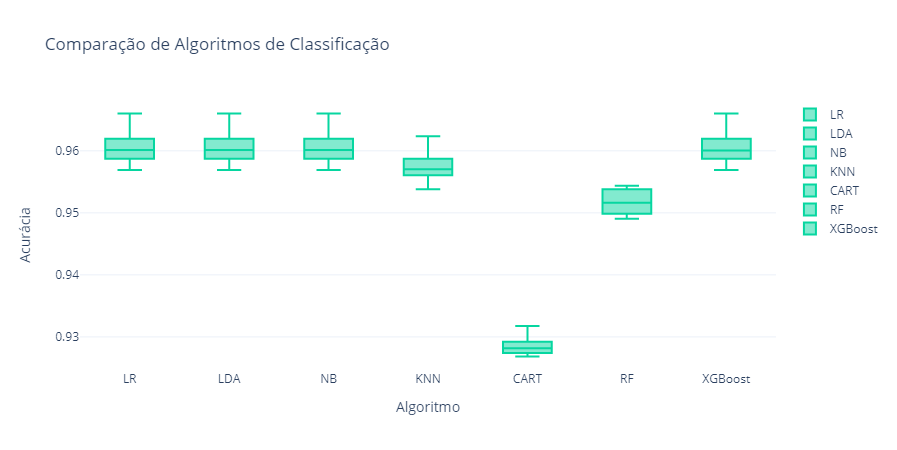

In [ ]:
# Plotando os scores, da acurácia dos classificadores treinados, em boxplots.

plotBoxplot(data = resultsNDEtc[0])

In [ ]:
# Treinando classificadores, a partir da escala, e da técnica de Feature Selection utilizada.

resultsNDRfe = classifiersTraining (
    features = trainFeaturesNormDistribuition[list(bestFeaturesNames.loc['rfe'])], 
    tTarget  = trainTarget
)

LR: 0.960485 (0.002480)
LDA: 0.960471 (0.002473)
NB: 0.937975 (0.002702)
KNN: 0.957185 (0.003692)
CART: 0.950894 (0.002926)
RF: 0.957016 (0.002799)
XGBoost: 0.960429 (0.002526)


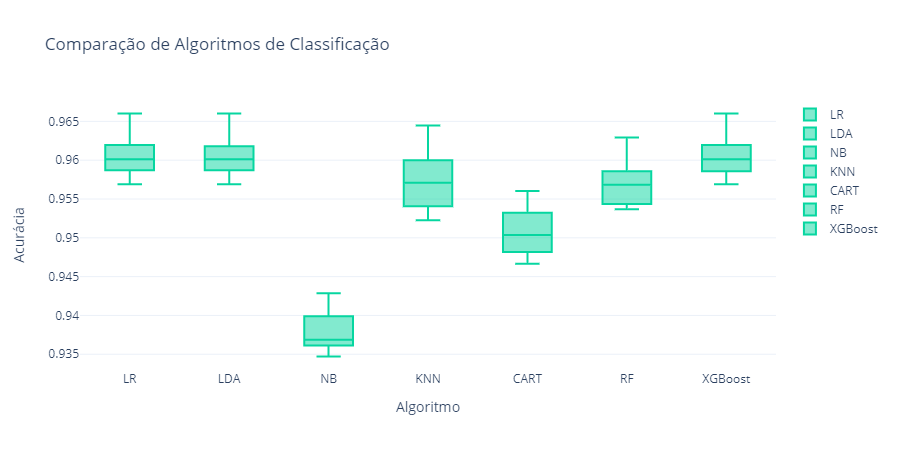

In [ ]:
# Plotando os scores, da acurácia dos classificadores treinados, em boxplots.

plotBoxplot(data = resultsNDRfe[0])

Os algoritmos **Logistc Regression**, **LDA** e **XGBoost**, foram os que obtiveram as melhores acurácias, para o conjunto de dados transformados pelo algoritmo *Box-Cox*, em praticamente todos os grupos de *Features* gerados.

#### **5.2.4 Treinando modelos com as Features Normalizadas**


In [ ]:
# Treinando classificadores, a partir da escala, e da técnica de Feature Selection utilizada.

resultsNSkb = classifiersTraining (
    features = trainFeaturesNormalized[list(bestFeaturesNames.loc['skb'])], 
    tTarget  = trainTarget
)

LR: 0.960471 (0.002493)
LDA: 0.958617 (0.002583)
NB: 0.933495 (0.002747)
KNN: 0.958252 (0.002506)
CART: 0.948900 (0.001916)
RF: 0.950304 (0.002079)
XGBoost: 0.960415 (0.002503)


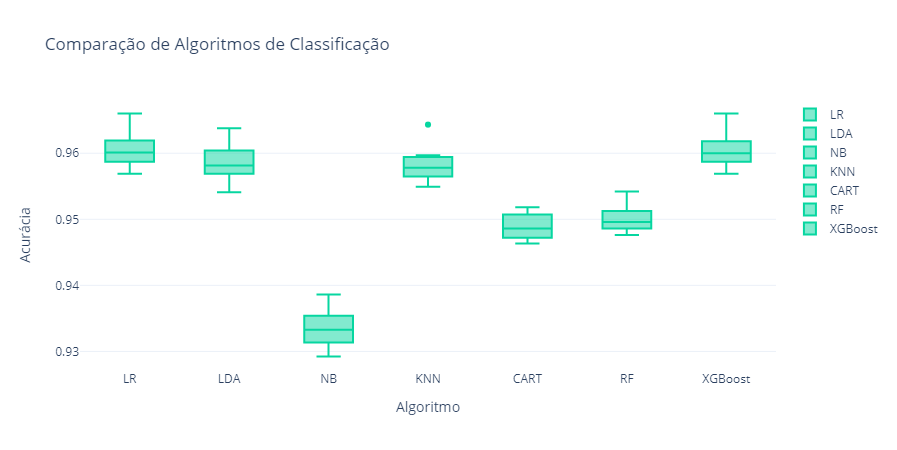

In [ ]:
# Plotando os scores, da acurácia dos classificadores treinados, em boxplots.

plotBoxplot(data = resultsNSkb[0])

In [ ]:
# Treinando classificadores, a partir da escala, e da técnica de Feature Selection utilizada.

resultsNIg = classifiersTraining (
    features = trainFeaturesNormalized[list(bestFeaturesNames.loc['ig'])], 
    tTarget  = trainTarget
)

LR: 0.960471 (0.002493)
LDA: 0.955570 (0.003201)
NB: 0.958168 (0.002738)
KNN: 0.958364 (0.002501)
CART: 0.950388 (0.002168)
RF: 0.959544 (0.002232)
XGBoost: 0.960429 (0.002467)


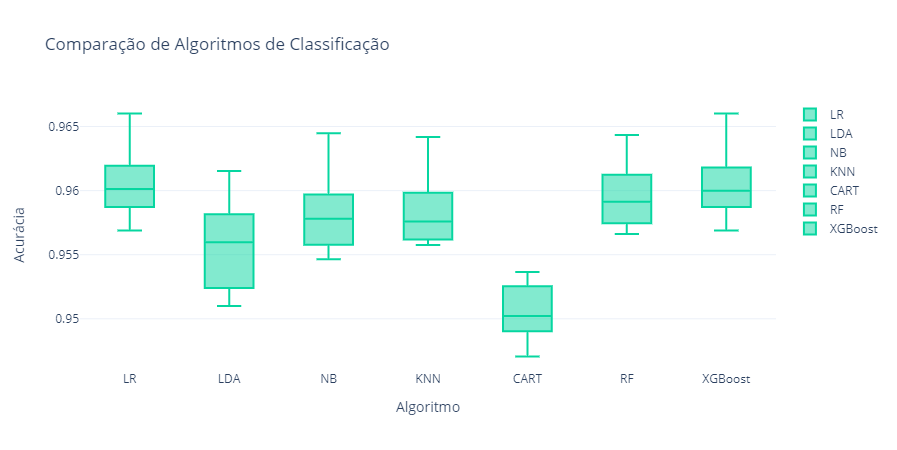

In [ ]:
# Plotando os scores, da acurácia dos classificadores treinados, em boxplots.

plotBoxplot(data = resultsNIg[0])

In [ ]:
# Treinando classificadores, a partir da escala, e da técnica de Feature Selection utilizada.

resultsNAnova = classifiersTraining (
    features = trainFeaturesNormalized[list(bestFeaturesNames.loc['anova'])], 
    tTarget  = trainTarget
)

LR: 0.960471 (0.002493)
LDA: 0.960471 (0.002493)
NB: 0.960471 (0.002493)
KNN: 0.960035 (0.002431)
CART: 0.959179 (0.001998)
RF: 0.959727 (0.002157)
XGBoost: 0.960471 (0.002493)


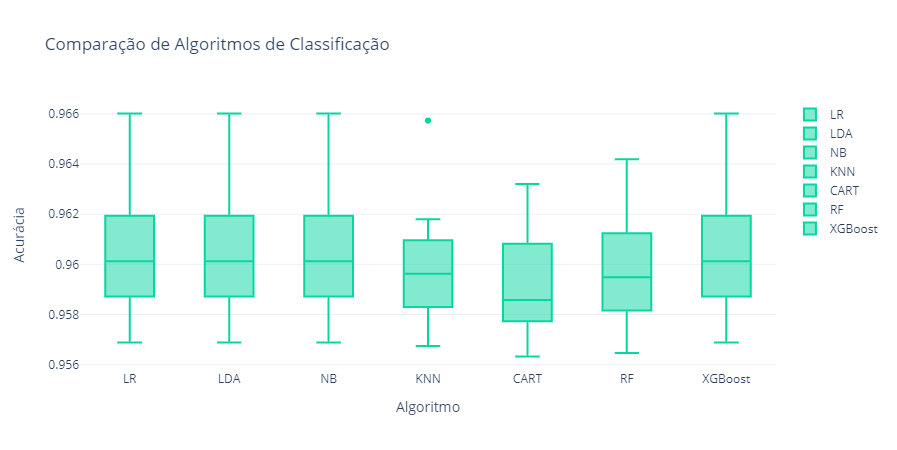

In [ ]:
# Plotando os scores, da acurácia dos classificadores treinados, em boxplots.

plotBoxplot(data = resultsNAnova[0])

In [ ]:
# Treinando classificadores, a partir da escala, e da técnica de Feature Selection utilizada.

resultsNSfs = classifiersTraining (
    features = trainFeaturesNormalized[list(bestFeaturesNames.loc['sfs'])], 
    tTarget  = trainTarget
)

LR: 0.960471 (0.002493)
LDA: 0.957241 (0.002363)
NB: 0.920857 (0.002246)
KNN: 0.956132 (0.002476)
CART: 0.934759 (0.002813)
RF: 0.959769 (0.002308)
XGBoost: 0.960415 (0.002485)


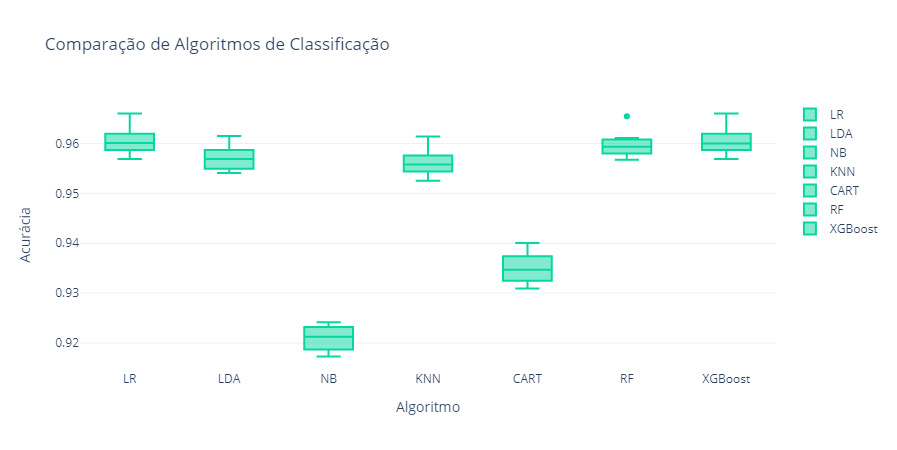

In [ ]:
# Plotando os scores, da acurácia dos classificadores treinados, em boxplots.

plotBoxplot(data = resultsNSfs[0])

In [ ]:
# Treinando classificadores, a partir da escala, e da técnica de Feature Selection utilizada.

resultsNEtc = classifiersTraining (
    features = trainFeaturesNormalized[list(bestFeaturesNames.loc['etc'])], 
    tTarget  = trainTarget
)

LR: 0.960471 (0.002493)
LDA: 0.957508 (0.002515)
NB: 0.926193 (0.002696)
KNN: 0.956328 (0.002754)
CART: 0.930968 (0.002735)
RF: 0.959095 (0.002063)
XGBoost: 0.960471 (0.002493)


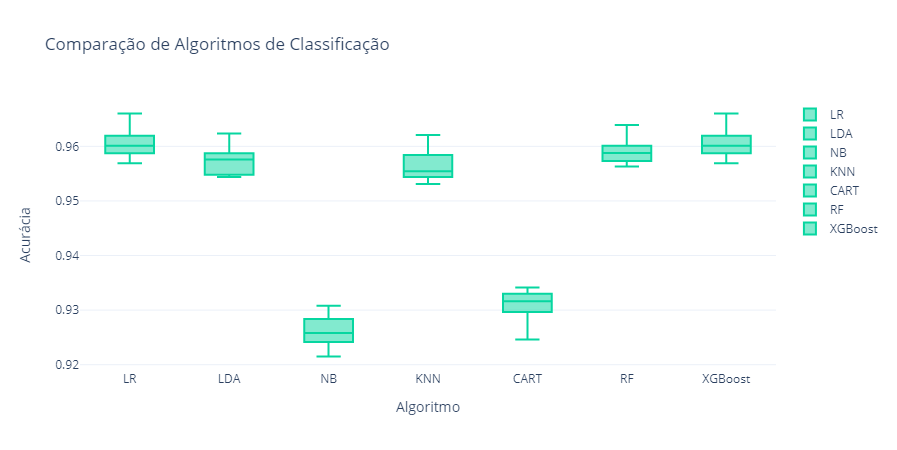

In [ ]:
# Plotando os scores, da acurácia dos classificadores treinados, em boxplots.

plotBoxplot(data = resultsNEtc[0])

In [ ]:
# Treinando classificadores, a partir da escala, e da técnica de Feature Selection utilizada.

resultsNRfe = classifiersTraining (
    features = trainFeaturesNormalized[list(bestFeaturesNames.loc['rfe'])], 
    tTarget  = trainTarget
)

LR: 0.960471 (0.002493)
LDA: 0.953070 (0.002570)
NB: 0.937989 (0.002346)
KNN: 0.956061 (0.002254)
CART: 0.933257 (0.002380)
RF: 0.955219 (0.001948)
XGBoost: 0.960471 (0.002493)


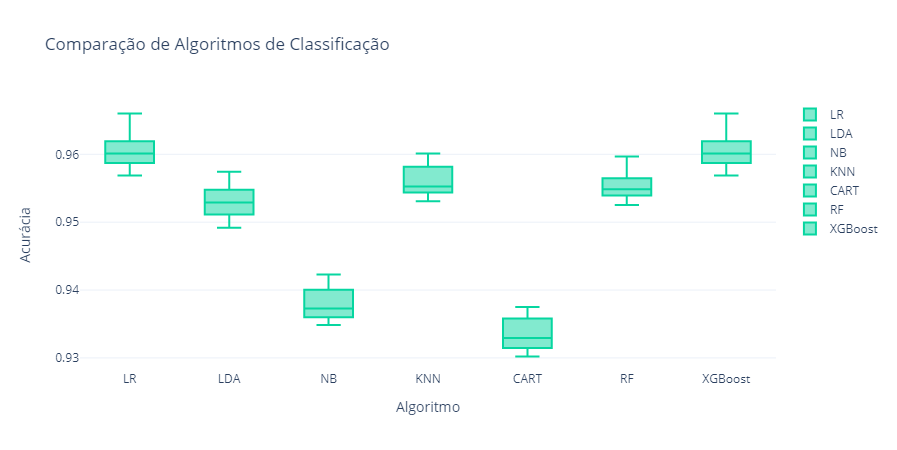

In [ ]:
# Plotando os scores, da acurácia dos classificadores treinados, em boxplots.

plotBoxplot(data = resultsNRfe[0])

Os algoritmos **Logistc Regression** e **XGBoost**, foram os que obtiveram as melhores acurácias, para o conjunto de dados transformados pelo algoritmo *normalize*, em praticamente todos os grupos de *Features* gerados.

### **5.3 Realizando previsões para o conjunto de dados de teste**

#### **5.3.1 Preparando classificadores**

Após alguns testes preliminares, observamos que as *features* selecionadas pelo algoritmo **RFE** foram as que obtiveram a melhor performance. E por isso, iremos utilizá-las nas fases a seguir.

In [ ]:
# Listando as siglas, das técnicas de Feature Selection utilizadas.

bestFeaturesNames.index

Index(['skb', 'ig', 'anova', 'sfs', 'etc', 'rf', 'rfe'], dtype='object')

In [ ]:
# Definindo qual resultado, das técnicas de Feature Selection, deve ser utilizado.

f = list(bestFeaturesNames.loc['rfe'])

#### **5.3.2 Aplicando diferentes escalas as Features de teste**

Nesta etapa, iremos aplicar diferentes transformações, nas variáveis preditoras dos conjuntos de dados de treino e de teste.

In [ ]:
# Aplicando a transformação MinMaxScaler, as Features do conjunto de dados de treino e de teste.

trainFeaturesMM, testFeaturesMM = dataTransform (
    train     = trainFeatures[f],
    test      = testFeatures[f],
    transform = 'MM'
)

In [ ]:
# Aplicando a transformação StandardScaler, as Features do conjunto de dados de treino e de teste.

trainFeaturesSS, testFeaturesSS = dataTransform (
    train     = trainFeatures[f],
    test      = testFeatures[f],
    transform = 'SS'
)

In [ ]:
# Aplicando a transformação Yeo-Johnson, as Features do conjunto de dados de treino e de teste.

trainFeaturesNormDistribuition, testFeaturesNormDistribuition = dataTransform (
    train     = trainFeatures[f],
    test      = testFeatures[f],
    transform = 'ND'
)

In [ ]:
# Aplicando a transformação Normalize, as Features do conjunto de dados de treino e de teste.

trainFeaturesNormalized, testFeaturesNormalized = dataTransform (
    train     = trainFeatures[f],
    test      = testFeatures[f],
    transform = 'N'
)

#### **5.3.3 Realizando previsões para o conjunto de dados de teste**

##### **5.3.3.1 Algoritmo Random Forest**

Iremos buscar pelos melhores parâmetros, para criar um modelo com o algoritmo **Random Forest**.

In [ ]:
# Definindo qual conjunto de dados de treino, já escalado, deve ser utilizado e a sua variável target.

trainX = trainFeaturesNormDistribuition[f]
trainY = trainTarget

# Definindo qual conjunto de dados de teste, já escalado, deve ser utilizado e a sua variável target.

testX = testFeaturesNormDistribuition[f]

# Definindo os valores que devem ser testados, em cada um dos parâmetros do modelo especificado.

paramGrid = dict (
    n_estimators = list(range(100, 301, 25)), 
    max_depth    = [16, 17, 18]
)

# Criando uma instância da classe do modelo Random Forest.

model = RandomForestClassifier()

# Criando o grid, para fazer a busca dos melhores parâmetros para o modelo.

grid = GridSearchCV(estimator = model, param_grid = paramGrid, cv = 10, verbose = True, n_jobs = -1)

# Buscando pelos melhores parâmetros para o modelo.

grid.fit(trainX, trainY)

# Exibindo a configuração, do melhor modelo treinado.

print("\n" + "Melhores Parâmetros para o Modelo:" + "\n\n", grid.best_estimator_)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 19.2min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed: 27.5min finished



Melhores Parâmetros para o Modelo:

 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=16, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [ ]:
# Criando o modelo, com a melhor configuração encontrada.

classifierRF = grid.best_estimator_

# Treinando o modelo, com os dados de treino.

classifierRF.fit(X = trainX, y = trainY)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=16, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# Calculando a acurácia do modelo, para o conjunto de dados de treino.

scoreTrainRF = accuracy_score(trainY, classifierRF.predict(trainX))

# Visualizando o resultado.

print('Acurácia para os dados de treino: ' + str(scoreTrainRF) + '\n' + 
      'ROC AUC para os dados de treino: ' + str(roc_auc_score(trainTarget, classifierRF.predict_proba(trainX)[:,1]))
)

Acurácia para os dados de treino: 0.9640655498293851
ROC AUC para os dados de treino: 0.9137236466305741


In [ ]:
# Salvando as previsões feitas pelo classificador, para o conjunto de teste em um arquivo CSV.

pd.DataFrame({
    'ID'    : testID,
    'TARGET': classifierRF.predict_proba(testX)[:, 1]
}).to_csv('/content/outputs/predRF.csv', index = False)

##### **5.3.3.2 Algoritmo Xgboost**

Iremos buscar pelos melhores parâmetros, para criar um modelo com algoritmo **Xgboost**.

In [ ]:
# Definindo qual conjunto de dados de treino, já escalado, deve ser utilizado e a sua variável target.

trainX = trainFeaturesNormDistribuition[f]
trainY = trainTarget

# Definindo qual conjunto de dados de teste, já escalado, deve ser utilizado e a sua variável target.

testX = testFeaturesNormDistribuition[f]

# Definindo os valores que devem ser testados, em cada um dos parâmetros do modelo especificado.

paramGrid = dict (
    missing          = [np.nan],
    max_depth        = [4, 5, 6], 
    n_estimators     = [340, 350, 360], 
    learning_rate    = [0.03], 
    nthread          = [4], 
    subsample        = [0.94, 0.95], 
    colsample_bytree = [0.85], 
    seed             = [100]
)

# Criando uma instância da classe do modelo Random Forest.

model = xgb.XGBClassifier()

# Criando o grid, para fazer a busca dos melhores parâmetros para o modelo.

grid = GridSearchCV(estimator = model, param_grid = paramGrid, cv = 10, verbose = True, n_jobs = -1)

# Buscando pelos melhores parâmetros para o modelo.

grid.fit(trainX, trainY)

# Exibindo a configuração, do melhor modelo treinado.

print("\n" + "Melhores Parâmetros para o Modelo:" + "\n\n", grid.best_estimator_)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 30.7min finished



Melhores Parâmetros para o Modelo:

 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.85, gamma=0,
              learning_rate=0.03, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=340, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=100,
              silent=None, subsample=0.94, verbosity=1)


In [ ]:
# Criando o modelo, com a melhor configuração encontrada.

classifierXGB = grid.best_estimator_

# Criando dados de treino e de validação.

xFit, xEval, yFit, yEval = train_test_split(trainX, trainTarget, test_size = 0.3)

# Treinando o modelo.

classifierXGB.fit (
    X                     = xFit, 
    y                     = yFit,
    early_stopping_rounds = 20,
    eval_metric           = "auc", 
    eval_set              = [(xEval, yEval)]
)

# Exibindo a métrica ROC AUC obtida.

print('Overall AUC:', roc_auc_score(trainTarget, classifierXGB.predict_proba(trainX)[:,1]))

[0]	validation_0-auc:0.808689
Will train until validation_0-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.808642
[2]	validation_0-auc:0.812259
[3]	validation_0-auc:0.813389
[4]	validation_0-auc:0.813168
[5]	validation_0-auc:0.813414
[6]	validation_0-auc:0.812494
[7]	validation_0-auc:0.816444
[8]	validation_0-auc:0.817728
[9]	validation_0-auc:0.81348
[10]	validation_0-auc:0.809975
[11]	validation_0-auc:0.80803
[12]	validation_0-auc:0.808099
[13]	validation_0-auc:0.810811
[14]	validation_0-auc:0.813426
[15]	validation_0-auc:0.809757
[16]	validation_0-auc:0.809879
[17]	validation_0-auc:0.813385
[18]	validation_0-auc:0.809514
[19]	validation_0-auc:0.811441
[20]	validation_0-auc:0.811396
[21]	validation_0-auc:0.814651
[22]	validation_0-auc:0.814736
[23]	validation_0-auc:0.815052
[24]	validation_0-auc:0.815528
[25]	validation_0-auc:0.815563
[26]	validation_0-auc:0.815766
[27]	validation_0-auc:0.815724
[28]	validation_0-auc:0.818521
[29]	validation_0-auc:0.816205
[30]	validation_0-

In [ ]:
# Calculando a acurácia e o ROC AUC do modelo, para o conjunto de dados de treino.

scoreTrainXGB  = accuracy_score(trainY, classifierXGB.predict(trainX))
rocAucTrainXGB = roc_auc_score(trainTarget, classifierXGB.predict_proba(trainX)[:,1])

# Visualizando o resultado.

print('Acurácia para os dados de treino: ' + str(scoreTrainXGB) + '\n' + 
      'ROC AUC para os dados de treino: ' + str(rocAucTrainXGB)
)

Acurácia para os dados de treino: 0.9604707005743334
ROC AUC para os dados de treino: 0.8323061132582221


In [ ]:
# Salvando as previsões feitas pelo classificador, para o conjunto de teste em um arquivo CSV.

pd.DataFrame({
    'ID'    : testID,
    'TARGET': classifierXGB.predict_proba(testX)[:, 1]
}).to_csv('/content/outputs/predXGB.csv', index = False)

#### **5.3.4 Avaliando as métricas do melhor classificador para os dados de teste**

O melhor classificador treinado, utiliza o algoritmo **XGBoost** com as *features* transformadas pela técnica **Box-Cox**. Salvaremos as configurações deste modelo em um arquivo *.sav*. 

In [ ]:
# Salvando o modelo preditivo especificado.

saveModel(name = 'classifierXGB', model = classifierXGB)

Modelo salvo!


Caso deseje pular as etapas anteriores de treinamento, execute o comando a seguir, para carregar o modelo já treinado.

In [ ]:
# Carregando o modelo preditivo especificado.

classifierXGB = loadModel(name = 'classifierXGB')

Modelo carregado!


Finalizamos esta análise, concluindo que o algoritmo **XGBoost**, gerou o modelo com o melhor score para a *acurácia* e métrica *ROC AUC*. O score alcançado para os conjuntos de dados de teste para o *ROC AUC*, **segundo a avaliação do Kaggle** foi:

* ***ROC AUC* para os dados de teste**: 0.82337.


## **Entre em contato comigo!**

Caso tenha alguma dúvida, sugestão ou apenas queira trocar uma ideia sobre este projeto, não hesite em entrar em contato comigo!

<table align='center'>
    <tr style=" background-color: rgba(0,0,0,0);">
        <td>
            <img src="https://image.flaticon.com/icons/svg/732/732026.svg" alt="Email" height="42" width="42">
        </td>
        <td>
            <p>
                <a href="mailto:franklinfs390@gmail.com">E-mail</href>
            </p>
        </td>
    <td>
            <img src="https://image.flaticon.com/icons/svg/254/254394.svg" alt="Linkedin" height="42" width="42">
    </td>
    <td>
        <p>
            <a href="https://www.linkedin.com/in/franklinfs390/">Linkedin</href>
        </p>
    </td>
    <td>
        <img src="https://image.flaticon.com/icons/svg/2111/2111432.svg" alt="Github" height="42" width="42">
    </td>
    <td>
        <p>
            <a href="https://github.com/franklin390">Github</href>
        </p>
    </td>
    <td>
        <img src="https://image.flaticon.com/icons/svg/1667/1667233.svg" alt="Site" height="42" width="42">
    </td>
    <td>
        <p>
            <a href="https://franklin390.github.io/">Site</href>
        </p>
    </td>
  </tr>
</table>
